# Connected mobility 
# Assignment 3

In [372]:
import json
import csv
import random
import pandas as pd
import requests
import pycountry
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from ipwhois import IPWhois
import socket

## Data preparation

In [373]:
# Opening JSON file and loading the data
# into the variable data
with open('20230130.json') as json_file:
    data = json.load(json_file)
 

old_data = data['objects']
 
# now we will open a file for writing
data_file = open('20230130.csv', 'w')
 
# create the csv writer object
csv_writer = csv.writer(data_file)
 
# Counter variable used for writing
# headers to the CSV file
count = 0
 
for d in old_data:
    if count == 0:
        header = d.keys()
        csv_writer.writerow(header)
        count += 1
 
    # Writing data of CSV file
    csv_writer.writerow(d.values())
 
data_file.close()

df_probes_country_codes = pd.read_csv("20230130.csv")

df_probes_country_codes = df_probes_country_codes[df_probes_country_codes["status_name"] == "Connected"] 

tags = ["lte", "4g", "mobile", "3g"]
df_probes_country_codes = df_probes_country_codes[df_probes_country_codes["tags"].apply(lambda x: any(tag in x for tag in tags))]

print(df_probes_country_codes)



            id      address_v4                              address_v6  \
239    1000234             NaN  2a01:598:b9a3:9b97:dea6:32ff:fe23:6be1   
409    1000402    89.24.32.132                                     NaN   
453    1000446  178.159.242.69                                     NaN   
490    1000483   145.40.222.34                    2a0e:b102:170:50::31   
511    1000503             NaN                                     NaN   
...        ...             ...                                     ...   
38016    62505  172.58.174.186                                     NaN   
38093    62684  217.178.24.147                                     NaN   
38098    62696    172.58.87.31  2607:fb90:fa04:8dc5:da58:d7ff:fe03:14c   
38178    62868     98.97.39.44                                     NaN   
38921      689  143.238.136.79  2001:8003:3835:9901:220:4aff:fec5:5892   

        asn_v4    asn_v6         prefix_v4            prefix_v6  is_anchor  \
239        NaN    3320.0         

## Choose probes countries
### Here we filter the probes to get different ones from all continents

In [374]:
df["country_code"].unique()

array(['DE', 'CZ', 'BY', 'CH', 'SE', 'RU', 'LV', 'IT', 'NZ', 'JO', 'GB',
       'US', 'AU', 'ID', 'FI', 'IN', 'SK', 'FR', 'CA', 'NL', 'HK', 'AT',
       'NO', 'EE', 'ES', 'PL', 'BG', 'IR', 'JP', 'DK', 'CL', 'RO', 'GR',
       'TN', 'KZ', 'MY', 'UA', 'IQ', 'RE', 'SI', 'SA', nan, 'MN', 'TR'],
      dtype=object)

Europe

In [375]:
df_de = df[df["country_code"] == "DE"]
# sample_de = df_de.sample(n=26, random_state=123)
id_string_de = ", ".join(map(str, df_de["id"]))
id_string_de

'1000234, 1000568, 1002075, 1002318, 1003425, 1004094, 1004571, 1004854, 24555, 25262, 25993, 26320, 2659, 28260, 30626, 3333, 33376, 33622, 34612, 50081, 50412, 50532, 53236, 53821, 55677, 62047'

In [376]:
df_ru = df[df["country_code"] == "RU"]
# sample_ru = df_ru.sample(n=10, random_state=123)
id_string_ru = ", ".join(map(str, df_ru["id"]))
id_string_ru

'1000879, 1003494, 33318, 3959, 50024, 52413, 54146'

In [377]:
df_es = df[df["country_code"] == "ES"]
# sample_es = df_es.sample(n=10, random_state=123)
id_string_es = ", ".join(map(str, df_es["id"]))
id_string_es

'14842, 18565, 28761'

In [378]:
df_dk = df[df["country_code"] == "DK"]
# sample_dk = df_dk.sample(n=10, random_state=123)
id_string_dk = ", ".join(map(str, df_dk["id"]))
id_string_dk

'26705, 29793, 50705, 54028'

In [379]:
df_gb = df[df["country_code"] == "GB"]
# sample_dk = df_dk.sample(n=10, random_state=123)
id_string_gb = ", ".join(map(str, df_gb["id"]))
id_string_gb

'1002421, 1002522, 1002683, 1004866, 51136, 53842, 54532, 54866, 55293'

North America

In [380]:
df_us = df[df["country_code"] == "US"]
# sample_us = df_us.sample(n=19, random_state=123)
id_string_us = ", ".join(map(str, df_us["id"]))
id_string_us

'1002591, 1002626, 1003040, 1004212, 1005000, 14226, 16790, 16896, 18667, 23036, 4069, 50180, 51459, 55018, 55630, 60162, 60435, 60605, 60822, 61113, 61785, 61816, 61868, 62505, 62696, 62868'

In [381]:
df_ca = df[df["country_code"] == "CA"]
# sample_ca = df_ca.sample(n=10, random_state=123)
id_string_ca = ", ".join(map(str, df_ca["id"]))
id_string_ca

'1004821'

Australia

In [382]:
df_au = df[df["country_code"] == "AU"]
# sample_au = df_au.sample(n=10, random_state=123)
id_string_au = ", ".join(map(str, df_au["id"]))
id_string_au

'1002682, 20825, 28477, 61689, 689'

In [383]:
df_nz = df[df["country_code"] == "NZ"]
# sample_au = df_au.sample(n=10, random_state=123)
id_string_nz = ", ".join(map(str, df_nz["id"]))
id_string_nz

'1002225'

Asia

In [384]:
df_cn = df[df["country_code"] == "CN"]
# sample_cn = df_cn.sample(n=5, random_state=123)
id_string_cn = ", ".join(map(str, df_cn["id"]))
id_string_cn

''

In [385]:
df_kz = df[df["country_code"] == "KZ"]
# sample_kz = df_kz.sample(n=5, random_state=123)
id_string_kz = ", ".join(map(str, df_kz["id"]))
id_string_kz

'32473'

In [386]:
df_in = df[df["country_code"] == "IN"]
# sample_kz = df_kz.sample(n=5, random_state=123)
id_string_in = ", ".join(map(str, df_in["id"]))
id_string_in

'1002932'

In [387]:
df_jp = df[df["country_code"] == "JP"]
# sample_kz = df_kz.sample(n=5, random_state=123)
id_string_jp = ", ".join(map(str, df_jp["id"]))
id_string_jp

'17602, 17789, 3457, 62684'

Africa

In [388]:
df_ma = df[df["country_code"] == "MA"]
# sample_ma = df_ma.sample(n=3, random_state=123)
id_string_ma = ", ".join(map(str, df_ma["id"]))
id_string_ma

''

In [389]:
df_za = df[df["country_code"] == "ZA"]
# sample_za = df_za.sample(n=7, random_state=123)
id_string_za = ", ".join(map(str, df_za["id"]))
id_string_za

''

South America

In [390]:
df_cl = df[df["country_code"] == "CL"]
# sample_co = df_co.sample(n=5, random_state=123)
id_string_cl = ", ".join(map(str, df_cl["id"]))
id_string_cl

'26834'

In [391]:
df_ar = df[df["country_code"] == "AG"]
# sample_ar = df_ar.sample(n=5, random_state=123)
id_string_ar = ", ".join(map(str, df_ar["id"]))
id_string_ar

''

In [392]:
final_id_string = id_string_nz + ", " + id_string_in + ", " + id_string_de + ", " + id_string_gb + ", " + id_string_jp + ", " + id_string_ru + ", " + id_string_es + ", " + id_string_dk + ", " + id_string_us + ", " + id_string_ca + ", " + id_string_au + ", " + id_string_cn + ", " + id_string_kz + ", " + id_string_ma + ", " + id_string_za + ", " + id_string_ar

final_id_string

'1002225, 1002932, 1000234, 1000568, 1002075, 1002318, 1003425, 1004094, 1004571, 1004854, 24555, 25262, 25993, 26320, 2659, 28260, 30626, 3333, 33376, 33622, 34612, 50081, 50412, 50532, 53236, 53821, 55677, 62047, 1002421, 1002522, 1002683, 1004866, 51136, 53842, 54532, 54866, 55293, 17602, 17789, 3457, 62684, 1000879, 1003494, 33318, 3959, 50024, 52413, 54146, 14842, 18565, 28761, 26705, 29793, 50705, 54028, 1002591, 1002626, 1003040, 1004212, 1005000, 14226, 16790, 16896, 18667, 23036, 4069, 50180, 51459, 55018, 55630, 60162, 60435, 60605, 60822, 61113, 61785, 61816, 61868, 62505, 62696, 62868, 1004821, 1002682, 20825, 28477, 61689, 689, , 32473, , , '

## Download all measurements

In [23]:
# traceroute
!curl "https://atlas.ripe.net/api/v2/measurements/49549055/results/?start=1675372722&stop=1675983300&format=json"

[{"fw":5080,"mver":"2.6.2","lts":8,"endtime":1675376536,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.3.21","proto":"ICMP","af":4,"size":48,"paris_id":1,"result":[{"hop":1,"result":[{"from":"192.168.3.1","ttl":64,"size":76,"rtt":0.449},{"from":"192.168.3.1","ttl":64,"size":76,"rtt":0.392},{"from":"192.168.3.1","ttl":64,"size":76,"rtt":0.402}]},{"hop":2,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":3,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":4,"result":[{"from":"10.81.7.153","ttl":252,"size":68,"rtt":17.402},{"from":"10.81.7.153","ttl":252,"size":68,"rtt":16.866},{"from":"10.81.7.153","ttl":252,"size":68,"rtt":13.857}]},{"hop":5,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":6,"result":[{"from":"62.52.29.18","ttl":250,"size":68,"rtt":32.523},{"from":"62.52.29.18","ttl":250,"size":68,"rtt":19.727},{"from":"62.52.29.18","ttl":250,"size":68,"rtt":18.855}]},{"hop":7,"result":[{"from":"62.53.4.82","ttl":244,"size":140,"rtt":18.968,"icmpext":{"version

t":17.068,"itos":40,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":11,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":12,"result":[{"from":"209.85.174.152","ttl":52,"size":68,"rtt":61.537,"itos":40},{"from":"209.85.174.152","ttl":52,"size":68,"rtt":32.014,"itos":40},{"from":"209.85.174.152","ttl":52,"size":68,"rtt":27.696,"itos":40}]},{"hop":13,"result":[{"from":"34.151.112.196","ttl":47,"size":48,"tos":96,"rtt":202.259},{"from":"34.151.112.196","ttl":47,"size":48,"tos":96,"rtt":205.535},{"from":"34.151.112.196","ttl":47,"size":48,"tos":96,"rtt":203.049}]}],"msm_id":49549055,"prb_id":60435,"timestamp":1675376569,"msm_name":"Traceroute","from":"172.59.187.68","type":"traceroute","group_id":49549054,"stored_timestamp":1675376713},{"fw":5080,"mver":"2.6.2","lts":59,"endtime":1675376570,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.0.116","proto":"ICMP","af":4,"size":48,"paris_id":1,"result":[{"hop":1,"result":[{"from":"192.168.0.1

7,"size":140,"rtt":100.931,"itos":96,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":614568,"exp":3,"s":1,"ttl":1}]}]}},{"from":"142.251.51.215","ttl":237,"size":140,"rtt":98.431,"itos":96,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":614568,"exp":3,"s":1,"ttl":1}]}]}}]},{"hop":18,"result":[{"x":"*"},{"from":"142.250.225.141","ttl":236,"size":140,"rtt":176.712,"itos":96,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":399719,"exp":3,"s":1,"ttl":1}]}]}},{"from":"142.250.225.141","ttl":236,"size":140,"rtt":171.726,"itos":96,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":399719,"exp":3,"s":1,"ttl":1}]}]}}]},{"hop":19,"result":[{"x":"*"},{"from":"142.251.78.159","ttl":237,"size":140,"rtt":180.964,"itos":96,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":788703,"exp":3,"s":1,"ttl":1}]}]}},{"x":"*"}]},{"hop":20,"result":[{"x":"*"},{"x":"

":250,"size":68,"rtt":25.846}]},{"hop":7,"result":[{"from":"62.6.204.173","ttl":248,"size":28,"rtt":24.549},{"from":"62.6.204.173","ttl":248,"size":28,"rtt":24.701},{"from":"62.6.204.173","ttl":248,"size":28,"rtt":22.344}]},{"hop":8,"result":[{"from":"109.159.253.237","ttl":55,"size":68,"rtt":27.547},{"from":"109.159.253.237","ttl":55,"size":68,"rtt":31.68},{"from":"109.159.253.237","ttl":55,"size":68,"rtt":26.467}]},{"hop":9,"result":[{"from":"34.151.112.196","ttl":54,"size":48,"rtt":290.996},{"from":"34.151.112.196","ttl":54,"size":48,"rtt":288.501},{"from":"34.151.112.196","ttl":54,"size":48,"rtt":289.769}]}],"msm_id":49549055,"prb_id":1002421,"timestamp":1675412497,"msm_name":"Traceroute","from":"31.94.5.7","type":"traceroute","group_id":49549054,"stored_timestamp":1675412567},{"fw":5080,"mver":"2.6.2","lts":23,"endtime":1675412593,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"172.17.0.2","proto":"ICMP","af":4,"size":48,"paris_id":1,"result":[{"hop":1,"result"

t":336.679}]}],"msm_id":49549055,"prb_id":50180,"timestamp":1675412660,"msm_name":"Traceroute","from":"216.71.106.5","type":"traceroute","group_id":49549054,"stored_timestamp":1675412906},{"fw":5080,"mver":"2.6.2","lts":45,"endtime":1675412714,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.3.202","proto":"ICMP","af":4,"size":48,"paris_id":2,"result":[{"hop":1,"result":[{"from":"192.168.3.1","ttl":64,"size":76,"rtt":1.059},{"from":"192.168.3.1","ttl":64,"size":76,"rtt":0.936},{"from":"192.168.3.1","ttl":64,"size":76,"rtt":0.851}]},{"hop":2,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":3,"result":[{"from":"172.20.197.225","ttl":63,"size":28,"rtt":31.227},{"from":"172.20.197.225","ttl":63,"size":28,"rtt":39.401},{"from":"172.20.197.225","ttl":63,"size":28,"rtt":39.462}]},{"hop":4,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":5,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":6,"result":[{"from":"172.20.244.5","ttl":60,"size":28,"rtt":48.116},{"from":"172

145.92.41","ttl":252,"size":68,"rtt":21.835}]},{"hop":5,"result":[{"from":"217.5.70.101","ttl":250,"size":140,"rtt":22.731,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"217.5.70.101","ttl":250,"size":140,"rtt":22.839,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"217.5.70.101","ttl":250,"size":140,"rtt":23.71,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":6,"result":[{"from":"80.150.170.70","ttl":246,"size":68,"rtt":23.112},{"from":"80.150.170.70","ttl":246,"size":68,"rtt":22.304},{"from":"80.150.170.70","ttl":246,"size":68,"rtt":22.402}]},{"hop":7,"result":[{"from":"34.151.112.196","ttl":58,"size":48,"rtt":304.272},{"from":"34.151.112.196","ttl":58,"size":48,"rtt":303.646},{"from":"34.151.112.196","ttl":58,"size":48,"rtt":303.614}]}],"msm_id":49549055,"prb_id":3333,"timestamp":1675448812,"msm_name":"Traceroute","from":"87.134.31.16","type":"traceroute","group_id":49549054,"stored_timestamp":1675448909

1","ttl":247,"size":28,"rtt":116.723},{"from":"69.83.80.151","ttl":247,"size":28,"rtt":70.664},{"from":"69.83.80.151","ttl":247,"size":28,"rtt":40.705}]},{"hop":10,"result":[{"from":"140.222.7.52","ttl":244,"size":28,"rtt":38.705},{"from":"140.222.7.52","ttl":244,"size":28,"rtt":46.234},{"from":"140.222.7.52","ttl":244,"size":28,"rtt":42.61}]},{"hop":11,"result":[{"x":"*"},{"from":"140.222.19.19","ttl":54,"size":28,"rtt":54.696},{"from":"140.222.19.19","ttl":54,"size":28,"rtt":36.566}]},{"hop":12,"result":[{"from":"152.179.43.154","ttl":49,"size":28,"rtt":133.728},{"from":"152.179.43.154","ttl":49,"size":28,"rtt":43.466},{"from":"152.179.43.154","ttl":49,"size":28,"rtt":64.895}]},{"hop":13,"result":[{"from":"34.151.112.196","ttl":53,"size":48,"tos":96,"rtt":221.801},{"from":"34.151.112.196","ttl":53,"size":48,"tos":96,"rtt":308.489},{"from":"34.151.112.196","ttl":53,"size":48,"tos":96,"rtt":212.728}]}],"msm_id":49549055,"prb_id":60605,"timestamp":1675484764,"msm_name":"Traceroute","fro

094}]},{"hop":4,"result":[{"from":"80.156.163.42","ttl":60,"size":68,"rtt":15.75},{"from":"80.156.163.42","ttl":60,"size":68,"rtt":13.654},{"from":"80.156.163.42","ttl":60,"size":68,"rtt":13.478}]},{"hop":5,"result":[{"from":"34.151.112.196","ttl":60,"size":48,"rtt":297.367},{"from":"34.151.112.196","ttl":60,"size":48,"rtt":295.414},{"from":"34.151.112.196","ttl":60,"size":48,"rtt":295.888}]}],"msm_id":49549055,"prb_id":33622,"timestamp":1675520488,"msm_name":"Traceroute","from":"62.158.21.228","type":"traceroute","group_id":49549054,"stored_timestamp":1675520615},{"fw":4790,"lts":529,"endtime":1675520482,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"172.16.0.200","proto":"ICMP","af":4,"size":48,"paris_id":5,"result":[{"hop":1,"result":[{"from":"172.16.0.252","ttl":64,"size":76,"rtt":3.506},{"from":"172.16.0.252","ttl":64,"size":76,"rtt":1.614},{"from":"172.16.0.252","ttl":64,"size":76,"rtt":1.749}]},{"hop":2,"result":[{"from":"124.155.82.131","ttl":254,"size":28,

"ttl":250,"size":140,"rtt":37.466,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":6,"result":[{"from":"80.150.170.70","ttl":246,"size":68,"rtt":22.939},{"from":"80.150.170.70","ttl":246,"size":68,"rtt":22.472},{"from":"80.150.170.70","ttl":246,"size":68,"rtt":22.664}]},{"hop":7,"result":[{"from":"34.151.112.196","ttl":58,"size":48,"rtt":303.68},{"from":"34.151.112.196","ttl":58,"size":48,"rtt":303.974},{"from":"34.151.112.196","ttl":58,"size":48,"rtt":302.929}]}],"msm_id":49549055,"prb_id":3333,"timestamp":1675556805,"msm_name":"Traceroute","from":"87.134.31.16","type":"traceroute","group_id":49549054,"stored_timestamp":1675556829},{"fw":4790,"lts":232,"endtime":1675556835,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.0.224","proto":"ICMP","af":4,"size":48,"paris_id":6,"result":[{"hop":1,"result":[{"from":"192.168.0.1","ttl":64,"size":76,"rtt":1.71},{"from":"192.168.0.1","ttl":64,"size":76,"rtt":1.779},{"from":"192.168.0.1","ttl"

j":[{"class":0,"type":0}]}},{"from":"108.170.236.41","ttl":235,"size":140,"rtt":98.308,"ittl":2,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"108.170.236.41","ttl":235,"size":140,"rtt":99.011,"ittl":2,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":15,"result":[{"from":"216.239.51.231","ttl":237,"size":140,"rtt":167.324,"ittl":3,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"216.239.51.231","ttl":237,"size":140,"rtt":171.066,"ittl":3,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"216.239.51.231","ttl":237,"size":140,"rtt":172.365,"ittl":3,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":16,"result":[{"from":"142.251.64.249","ttl":238,"size":140,"rtt":180.083,"ittl":4,"itos":96,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"142.251.64.249","ttl":238,"size":140,"rtt":181.336,

{"from":"10.80.0.1","ttl":255,"size":28,"rtt":5.576},{"from":"10.80.0.1","ttl":255,"size":28,"rtt":18.451}]},{"hop":2,"result":[{"from":"100.120.110.82","ttl":254,"size":68,"rtt":8.19},{"from":"100.120.110.82","ttl":254,"size":68,"rtt":8.782},{"from":"100.120.110.82","ttl":254,"size":68,"rtt":9.127}]},{"hop":3,"result":[{"from":"100.120.108.38","ttl":254,"size":28,"rtt":9.386},{"from":"100.120.108.38","ttl":254,"size":28,"rtt":9.101},{"from":"100.120.108.38","ttl":254,"size":28,"rtt":9.311}]},{"hop":4,"result":[{"from":"68.1.4.254","ttl":250,"size":28,"rtt":16.133},{"from":"68.1.4.254","ttl":250,"size":28,"rtt":13.139},{"from":"68.1.4.254","ttl":250,"size":28,"rtt":12.476}]},{"hop":5,"result":[{"from":"72.14.196.240","ttl":60,"size":68,"rtt":23.294},{"from":"72.14.196.240","ttl":60,"size":68,"rtt":50.633},{"from":"72.14.196.240","ttl":60,"size":68,"rtt":22.895}]},{"hop":6,"result":[{"from":"34.151.112.196","ttl":60,"size":48,"rtt":159.347},{"from":"34.151.112.196","ttl":60,"size":48,"r

51.112.196","ttl":47,"size":48,"tos":96,"rtt":204.481},{"from":"34.151.112.196","ttl":47,"size":48,"tos":96,"rtt":203.083}]}],"msm_id":49549055,"prb_id":60435,"timestamp":1675664566,"msm_name":"Traceroute","from":"172.59.187.68","type":"traceroute","group_id":49549054,"stored_timestamp":1675664728},{"fw":5080,"mver":"2.6.2","lts":39,"endtime":1675664568,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.0.116","proto":"ICMP","af":4,"size":48,"paris_id":9,"result":[{"hop":1,"result":[{"from":"192.168.0.1","ttl":64,"size":76,"rtt":1.807},{"from":"192.168.0.1","ttl":64,"size":76,"rtt":1.319},{"from":"192.168.0.1","ttl":64,"size":76,"rtt":1.196}]},{"hop":2,"result":[{"from":"101.118.128.1","ttl":63,"size":76,"rtt":7.643},{"from":"101.118.128.1","ttl":63,"size":76,"rtt":7.515},{"from":"101.118.128.1","ttl":63,"size":76,"rtt":7.921}]},{"hop":3,"result":[{"from":"10.246.243.38","ttl":252,"size":68,"rtt":8.373},{"from":"10.246.243.38","ttl":252,"size":68,"rtt":7.473},{

},{"x":"*"},{"x":"*"}]},{"hop":8,"result":[{"from":"192.0.0.1","ttl":58,"size":76,"rtt":14.94,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":58,"size":76,"rtt":11.874,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":58,"size":76,"rtt":12.218,"ittl":0,"itos":40}]},{"hop":9,"result":[{"from":"10.162.181.117","ttl":249,"size":68,"rtt":9.111,"itos":40},{"from":"10.162.181.117","ttl":249,"size":68,"rtt":9.842,"itos":40},{"from":"10.162.181.117","ttl":249,"size":68,"rtt":10.226,"itos":40}]},{"hop":10,"result":[{"from":"10.177.76.145","ttl":244,"size":140,"rtt":24.29,"itos":40,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"10.177.76.145","ttl":244,"size":140,"rtt":19.49,"itos":40,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"10.177.76.145","ttl":244,"size":140,"rtt":19.7,"itos":40,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":11,"result":[{"from":"10.177.76.141","ttl":245,"size":140,"rtt":19.433,"ittl":2,"itos":

14,"result":[{"from":"4.69.133.29","ttl":238,"size":28,"rtt":93.548},{"from":"4.69.133.29","ttl":238,"size":28,"rtt":88.504},{"from":"4.69.133.29","ttl":238,"size":28,"rtt":100.575}]},{"hop":15,"result":[{"from":"4.68.63.130","ttl":45,"size":76,"rtt":88.543},{"from":"4.68.63.130","ttl":45,"size":76,"rtt":89.589},{"from":"4.68.63.130","ttl":45,"size":76,"rtt":89.635}]},{"hop":16,"result":[{"from":"34.151.112.196","ttl":35,"size":48,"rtt":338.549},{"from":"34.151.112.196","ttl":35,"size":48,"rtt":342.449},{"from":"34.151.112.196","ttl":35,"size":48,"rtt":346.644}]}],"msm_id":49549055,"prb_id":50180,"timestamp":1675700671,"msm_name":"Traceroute","from":"216.71.106.5","type":"traceroute","group_id":49549054,"stored_timestamp":1675700791},{"fw":5080,"mver":"2.6.2","lts":3,"endtime":1675700734,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.3.202","proto":"ICMP","af":4,"size":48,"paris_id":10,"result":[{"hop":1,"result":[{"from":"192.168.3.1","ttl":64,"size":76,"r

":64,"size":76,"rtt":1.113},{"from":"192.168.178.1","ttl":64,"size":76,"rtt":0.902},{"from":"192.168.178.1","ttl":64,"size":76,"rtt":0.834}]},{"hop":2,"result":[{"from":"185.12.88.134","ttl":254,"size":68,"rtt":1.339},{"from":"185.12.88.134","ttl":254,"size":68,"rtt":1.24},{"from":"185.12.88.134","ttl":254,"size":68,"rtt":1.213}]},{"hop":3,"result":[{"from":"185.1.210.34","ttl":253,"size":28,"rtt":4.322},{"from":"185.1.210.34","ttl":253,"size":28,"rtt":3.316},{"from":"185.1.210.34","ttl":253,"size":28,"rtt":3.332}]},{"hop":4,"result":[{"from":"34.151.112.196","ttl":60,"size":48,"rtt":279.594},{"from":"34.151.112.196","ttl":60,"size":48,"rtt":278.752},{"from":"34.151.112.196","ttl":60,"size":48,"rtt":278.646}]}],"msm_id":49549055,"prb_id":50412,"timestamp":1675736582,"msm_name":"Traceroute","from":"89.56.63.177","type":"traceroute","group_id":49549054,"stored_timestamp":1675736651},{"fw":5080,"mver":"2.6.2","lts":47,"endtime":1675736640,"dst_name":"34.151.112.196","dst_addr":"34.151.112

size":48,"rtt":314.966}]}],"msm_id":49549055,"prb_id":25993,"timestamp":1675772668,"msm_name":"Traceroute","from":"80.187.110.224","type":"traceroute","group_id":49549054,"stored_timestamp":1675772765},{"fw":4770,"lts":536,"endtime":1675772658,"dst_name":"34.151.112.196","dst_addr":"34.151.112.196","src_addr":"192.168.88.18","proto":"ICMP","af":4,"size":48,"paris_id":11,"result":[{"hop":1,"result":[{"from":"192.168.88.1","ttl":64,"size":76,"rtt":0.438},{"from":"192.168.88.1","ttl":64,"size":76,"rtt":0.297},{"from":"192.168.88.1","ttl":64,"size":76,"rtt":0.275}]},{"hop":2,"result":[{"from":"34.151.112.196","ttl":63,"size":48,"rtt":345.094},{"from":"34.151.112.196","ttl":63,"size":48,"rtt":339.083},{"from":"34.151.112.196","ttl":63,"size":48,"rtt":340.7}]}],"msm_id":49549055,"prb_id":33318,"timestamp":1675772657,"msm_name":"Traceroute","from":"213.87.86.201","type":"traceroute","group_id":49549054,"stored_timestamp":1675772765},{"fw":5080,"mver":"2.6.2","lts":28,"endtime":1675772662,"dst

,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":16601,"exp":0,"s":1,"ttl":1}]}]}},{"from":"62.53.28.128","ttl":244,"size":140,"rtt":24.695,"icmpext":{"version":2,"rfc4884":0,"obj":[{"class":1,"type":1,"mpls":[{"label":16601,"exp":0,"s":1,"ttl":1}]}]}}]},{"hop":8,"result":[{"from":"62.53.28.151","ttl":246,"size":140,"rtt":24.674,"ittl":3,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"62.53.28.151","ttl":246,"size":140,"rtt":18.238,"ittl":3,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}},{"from":"62.53.28.151","ttl":246,"size":140,"rtt":21.153,"ittl":3,"icmpext":{"version":0,"rfc4884":1,"obj":[{"class":0,"type":0}]}}]},{"hop":9,"result":[{"from":"62.53.8.189","ttl":247,"size":68,"rtt":23.125},{"from":"62.53.8.189","ttl":247,"size":68,"rtt":23.403},{"from":"62.53.8.189","ttl":247,"size":68,"rtt":26.983}]},{"hop":10,"result":[{"from":"72.14.198.209","ttl":51,"size":76,"rtt":25.018},{"from":"72.14.198.209","ttl":51,"size":76,"rtt":20.36

ize":76,"rtt":11.199,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":252,"size":76,"rtt":10.221,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":252,"size":76,"rtt":9.288,"ittl":0,"itos":40}]},{"hop":4,"result":[{"from":"192.0.0.1","ttl":252,"size":76,"rtt":9.586,"itos":40},{"from":"192.0.0.1","ttl":252,"size":76,"rtt":9.795,"itos":40},{"x":"*"}]},{"hop":5,"result":[{"from":"192.0.0.1","ttl":252,"size":76,"rtt":13.064,"itos":40},{"x":"*"},{"x":"*"}]},{"hop":6,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":7,"result":[{"x":"*"},{"x":"*"},{"x":"*"}]},{"hop":8,"result":[{"from":"192.0.0.1","ttl":58,"size":76,"rtt":36.716,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":58,"size":76,"rtt":15.285,"ittl":0,"itos":40},{"from":"192.0.0.1","ttl":58,"size":76,"rtt":13.651,"ittl":0,"itos":40}]},{"hop":9,"result":[{"from":"10.162.181.117","ttl":249,"size":68,"rtt":9.859,"itos":40},{"from":"10.162.181.117","ttl":249,"size":68,"rtt":14.69,"itos":40},{"from":"10.162.181.117","ttl":249,"size":68,"rtt":9.188

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [24]:
# ping
!curl "https://atlas.ripe.net/api/v2/measurements/49549054/results/?start=1675372722&stop=1675983300&format=json"

[{"fw":5080,"mver":"2.6.3","lts":40,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"89.31.112.10","proto":"ICMP","ttl":52,"size":48,"result":[{"rtt":272.979639},{"rtt":272.477893},{"rtt":272.437007}],"dup":0,"rcvd":3,"sent":3,"min":272.437007,"max":272.979639,"avg":272.631513,"msm_id":49549054,"prb_id":1000879,"timestamp":1675376513,"msm_name":"Ping","from":"89.31.112.10","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675376611},{"fw":5080,"mver":"2.6.2","lts":36,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"172.17.0.3","proto":"ICMP","ttl":57,"size":48,"result":[{"rtt":291.021854},{"rtt":290.014315},{"rtt":290.678012}],"dup":0,"rcvd":3,"sent":3,"min":290.014315,"max":291.021854,"avg":290.5713936667,"msm_id":49549054,"prb_id":1002075,"timestamp":1675376517,"msm_name":"Ping","from":"87.134.85.2","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675376592},{"fw":5040,"mver":"2.4.1","lts":-1,"dst_

tored_timestamp":1675376908},{"fw":5040,"mver":"2.4.1","lts":7,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.3.251","proto":"ICMP","ttl":48,"size":48,"result":[{"rtt":291.755176},{"rtt":245.895238},{"rtt":281.342962}],"dup":0,"rcvd":3,"sent":3,"min":245.895238,"max":291.755176,"avg":272.997792,"msm_id":49549054,"prb_id":1004212,"timestamp":1675376815,"msm_name":"Ping","from":"107.77.203.48","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675376874},{"fw":5080,"mver":"2.6.2","lts":11,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"100.71.2.60","proto":"ICMP","ttl":60,"size":48,"result":[{"rtt":289.680083},{"rtt":483.1665},{"rtt":290.062625}],"dup":0,"rcvd":3,"sent":3,"min":289.680083,"max":483.1665,"avg":354.3030693333,"msm_id":49549054,"prb_id":53821,"timestamp":1675376776,"msm_name":"Ping","from":"5.1.85.131","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675376917},{"fw":5080,"mver"

33,"msm_id":49549054,"prb_id":14842,"timestamp":1675448484,"msm_name":"Ping","from":"31.4.241.125","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675448550},{"fw":5080,"mver":"2.6.2","lts":26,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"10.200.0.2","proto":"ICMP","ttl":48,"size":48,"result":[{"rtt":276.153507},{"rtt":246.55781},{"rtt":250.596679}],"dup":0,"rcvd":3,"sent":3,"min":246.55781,"max":276.153507,"avg":257.769332,"msm_id":49549054,"prb_id":23036,"timestamp":1675448508,"msm_name":"Ping","from":"166.130.104.242","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675448562},{"fw":5080,"mver":"2.6.2","lts":6,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.1.2","proto":"ICMP","ttl":53,"size":48,"result":[{"rtt":329.018176},{"rtt":328.789887},{"rtt":346.443195}],"dup":0,"rcvd":3,"sent":3,"min":328.789887,"max":346.443195,"avg":334.7504193333,"msm_id":49549054,"prb_id":26320,"timestam

,"rcvd":3,"sent":3,"min":314.013921,"max":315.782755,"avg":314.9069426667,"msm_id":49549054,"prb_id":30626,"timestamp":1675484546,"msm_name":"Ping","from":"80.187.118.199","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675484739},{"fw":4790,"lts":167,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.25.106","proto":"ICMP","ttl":58,"size":48,"result":[{"rtt":303.502141},{"rtt":303.797821},{"rtt":303.413821}],"dup":0,"rcvd":3,"sent":3,"min":303.413821,"max":303.797821,"avg":303.571261,"msm_id":49549054,"prb_id":3333,"timestamp":1675484537,"msm_name":"Ping","from":"87.134.31.16","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675484937},{"fw":5080,"mver":"2.6.2","lts":35,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.178.21","proto":"ICMP","size":48,"result":[{"x":"*"},{"x":"*"},{"x":"*"}],"dup":0,"rcvd":0,"sent":3,"min":-1,"max":-1,"avg":-1,"msm_id":49549054,"prb_id":33376,"timesta

36000,"stored_timestamp":1675592600},{"fw":5080,"mver":"2.6.2","lts":50,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.0.34","proto":"ICMP","ttl":56,"size":48,"result":[{"rtt":301.016448},{"rtt":300.702144},{"rtt":300.508424}],"dup":0,"rcvd":3,"sent":3,"min":300.508424,"max":301.016448,"avg":300.7423386667,"msm_id":49549054,"prb_id":24555,"timestamp":1675592535,"msm_name":"Ping","from":"78.49.44.136","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675592631},{"fw":5080,"mver":"2.6.2","lts":8,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"172.31.0.198","proto":"ICMP","ttl":52,"size":48,"result":[{"rtt":335.926157},{"rtt":343.151965},{"rtt":333.53618}],"dup":0,"rcvd":3,"sent":3,"min":333.53618,"max":343.151965,"avg":337.5381006667,"msm_id":49549054,"prb_id":25262,"timestamp":1675592537,"msm_name":"Ping","from":"46.114.192.66","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675592832},{"f

68.0.171","proto":"ICMP","ttl":51,"size":48,"result":[{"rtt":273.139666},{"rtt":273.098042},{"rtt":272.351875}],"dup":0,"rcvd":3,"sent":3,"min":272.351875,"max":273.139666,"avg":272.8631943333,"msm_id":49549054,"prb_id":52413,"timestamp":1675628831,"msm_name":"Ping","from":"89.31.112.10","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675628941},{"fw":5080,"mver":"2.6.2","lts":39,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.1.14","proto":"ICMP","ttl":51,"size":48,"result":[{"rtt":273.542083},{"rtt":272.741375},{"rtt":271.970584}],"dup":0,"rcvd":3,"sent":3,"min":271.970584,"max":273.542083,"avg":272.7513473333,"msm_id":49549054,"prb_id":54146,"timestamp":1675628829,"msm_name":"Ping","from":"89.189.189.41","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675628930},{"fw":5080,"mver":"2.6.2","lts":6,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.12.163","proto":"ICMP","ttl":50,"s

:147.858078},{"rtt":145.955238}],"dup":0,"rcvd":3,"sent":3,"min":145.955238,"max":147.858078,"avg":147.2193513333,"msm_id":49549054,"prb_id":17602,"timestamp":1675880540,"msm_name":"Ping","from":"211.7.85.223","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675880617},{"fw":5080,"mver":"2.6.2","lts":11,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"192.168.0.34","proto":"ICMP","ttl":56,"size":48,"result":[{"rtt":299.833243},{"rtt":299.698214},{"rtt":299.621174}],"dup":0,"rcvd":3,"sent":3,"min":299.621174,"max":299.833243,"avg":299.7175436667,"msm_id":49549054,"prb_id":24555,"timestamp":1675880541,"msm_name":"Ping","from":"93.132.166.94","type":"ping","group_id":49549054,"step":36000,"stored_timestamp":1675880634},{"fw":5080,"mver":"2.6.2","lts":11,"dst_name":"34.151.112.196","af":4,"dst_addr":"34.151.112.196","src_addr":"172.31.0.198","proto":"ICMP","ttl":52,"size":48,"result":[{"rtt":334.244654},{"rtt":333.854539},{"rtt":333.333619}],"dup

## All used methods

## Initial df set up

In [442]:
# Method for processing the initial ping json measurement file
def process_json_file_ping(filename):
    df = pd.read_json(filename)

    rtt = []
    for row in df['result']:
        arr = []
        for i in row:
            if i.get('rtt') is not None:
                arr.append(i.get('rtt'))

        arr = sorted(arr)
        if len(arr) > 1:
            rtt.append(arr[1])
        elif len(arr) > 0:
            rtt.append(arr[0])
        else:
            rtt.append(-1)

    df['rtt'] = pd.Series(rtt)
    df.drop(columns=['result'], inplace=True)
    df.sort_values(by='timestamp', inplace=True)
    
    arr = []
    map_ = {10743: 'US', 17979: 'GB', 52422: 'US', 60234: 'US', 60892: 'AU', 61366: 'GB', 61498: 'ES', 61731: 'US', 62868: 'US', 63024: 'AU', 19648: 'US', 50017: 'US', 53798: 'US', 54330: 'US', 60510: 'CA', 1001040: 'US', 1002289: 'DE', 55492: 'CA', 60328: 'GB', 61081: 'US', 12426: 'US', 22802: 'US', 23127: 'US', 24742: 'AU', 28221: 'US', 35042: 'CA', 60929: 'US', 61780: 'US', 62365: 'US', 62498: 'US', 62956: 'US', 15623: 'ES', 62741: 'US', 1002750: 'DE', 1004453: 'AU', 28: 'US', 50008: 'DE', 60323: 'DE', 62417: 'US', 52955: 'NZ', 61365: 'US', 61899: 'US', 54866: 'GB', 26320: 'DE', 14842: 'ES', 689: 'AU', 53236: 'DE', 50532: 'DE', 1004094: 'DE', 1000879: 'RU', 23036: 'US', 4069: 'US', 55018: 'US', 1002075: 'DE', 1002591: 'US', 1004854: 'DE', 62047: 'DE', 1002318: 'DE', 1000568: 'DE', 1002421: 'GB', 50705: 'DK', 53842: 'GB', 1004571: 'DE', 24555: 'DE', 51459: 'US', 17602: 'JP', 25262: 'DE', 62684: 'JP', 30626: 'DE', 55677: 'DE', 1002683: 'GB', 1002932: 'IN', 50081: 'DE', 2659: 'DE', 1003040: 'US', 33622: 'DE', 61816: 'US', 34612: 'DE', 60162: 'US', 51136: 'GB', 33376: 'DE', 28260: 'DE', 61868: 'US', 50412: 'DE', 60822: 'US', 62696: 'US', 14226: 'US', 18565: 'ES', 60435: 'US', 61689: 'AU', 61113: 'US', 29793: 'DK', 54028: 'DK', 55293: 'GB', 33318: 'RU', 50180: 'US', 16790: 'US', 18667: 'US', 25993: 'DE', 50024: 'RU', 53821: 'DE', 62505: 'US', 54532: 'GB', 60605: 'US', 1004212: 'US', 1003425: 'DE', 1005000: 'US', 1002225: 'NZ', 20825: 'AU', 1002682: 'AU', 1004866: 'GB', 32473: 'KZ', 3959: 'RU', 17789: 'JP', 52413: 'RU', 54146: 'RU', 3457: 'JP', 28477: 'AU', 61785: 'US', 1002522: 'GB', 3333: 'DE', 1002626: 'US', 55630: 'US', 17783: 'RU', 33085: 'CN', 14691: 'ZA', 13677: 'DE', 19450: 'DE', 17596: 'US', 55353: 'AU', 54983: 'CN', 12938: 'US', 53864: 'CA', 32341: 'CA', 50536: 'DK', 50573: 'KZ', 52969: 'ES', 13694: 'US', 55662: 'US', 51116: 'CA', 62873: 'US', 16450: 'ZA', 55456: 'DK', 53528: 'ES', 1000875: 'RU', 1004736: 'CO', 61385: 'DK', 15812: 'DE', 1000251: 'DE', 1001823: 'CA', 51551: 'ZA', 13754: 'ZA', 1004884: 'DE', 30381: 'ES', 34674: 'DK', 1000: 'AU', 52431: 'US', 23194: 'KZ', 53074: 'RU', 30255: 'CN', 51539: 'AU', 50859: 'KZ', 23971: 'RU', 11116: 'RU', 50229: 'AU', 54484: 'AU', 35641: 'CA', 1005143: 'AR', 1003510: 'ES', 17830: 'CA', 52209: 'CA', 15253: 'AR', 10515: 'US', 1005172: 'AR', 1000742: 'CO', 55712: 'US', 15105: 'DK', 55291: 'RU', 3054: 'AU', 29702: 'DE', 19994: 'ZA', 60290: 'DE', 1005150: 'AU', 2960: 'DE', 60120: 'DK', 1004181: 'ES', 1003801: 'RU', 19019: 'AU', 32925: 'MA', 51265: 'ES', 22338: 'ES', 60137: 'AR', 35765: 'ES', 27608: 'DK', 17797: 'US', 62908: 'ES', 17171: 'MA', 28664: 'RU', 53861: 'RU', 15523: 'RU', 25334: 'DK', 22488: 'DK', 1004999: 'CO', 1000731: 'CO', 1003358: 'KZ', 1005183: 'CN', 1003280: 'AU', 60319: 'ES', 33804: 'DE', 55330: 'US', 14629: 'CA', 52002: 'CA', 50396: 'ZA', 50192: 'ZA', 26834: 'CL', 28761: 'ES', 35586: 'CA', 33970: 'ES', 54383: 'RU', 60429: 'DK', 26576: 'DK', 27227: 'CO', 18651: 'ES', 31601: 'DE', 1003432: 'US', 13746: 'ZA', 32626: 'ES', 15053: 'CA', 17796: 'CA', 31519: 'US', 1174: 'CO', 50284: 'US', 14783: 'CA', 53558: 'DE', 29530: 'AU', 1005161: 'RU', 50477: 'CA', 52944: 'KZ', 12428: 'AU', 55313: 'CA', 882: 'DE', 61292: 'US', 28895: 'DE', 18169: 'ZA', 1004525: 'US', 1001603: 'ES', 1004488: 'ES', 13734: 'ZA', 16688: 'DK', 55328: 'CN', 54589: 'RU', 33343: 'AU', 32904: 'AU', 1002293: 'CA', 55785: 'RU', 1004097: 'CN', 1004871: 'ES', 55193: 'RU', 62059: 'AU', 7157: 'US', 18896: 'CA', 51818: 'US', 14377: 'DE', 55124: 'US', 28973: 'DE', 11090: 'US', 243: 'AR', 27180: 'RU', 53456: 'ES', 55420: 'ES', 4284: 'RU', 12344: 'MA', 35408: 'DE', 4041: 'ZA', 16286: 'DE', 6340: 'DK', 715: 'ES', 14325: 'ZA', 6804: 'US', 54520: 'RU', 14584: 'CN', 55624: 'RU', 26705: 'DK'}
    for i in df['prb_id']:
        arr.append(map_[i])
    
    df['country_code'] = pd.Series(arr)
    
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    df = df[df['rtt'] < 500]

    return df


Coordinates and country codes were taken from RIPE API using the functions below and then they were saved into the maps for time saving purpose. 

Here is also example of the response with the probes information:

{'address_v4': '185.59.220.139', 'address_v6': None, 'asn_v4': 60068, 'asn_v6': None, 
'country_code': 'DE', 'description': None, 'first_connected': 1645050779, 'geometry': {'type': 'Point', 
'coordinates': [8.6775, 50.1215]}, 'id': 1003718, 'is_anchor': False, 'is_public': True, 'last_connected': 
1676657358, 'prefix_v4': '185.59.220.0/24', 'prefix_v6': None, 'status': {'id': 1, 'name': 'Connected', 
'since': '2022-02-16T22:32:59Z'}, 'status_since': 1645050779, 'tags': [{'name': 'system: Auto GEOIP city', 
'slug': 'system-auto-geoip-city'}, {'name': 'system: IPv4 Capable', 'slug': 'system-ipv4-capable'}, {'name': 
'system: Resolves A Correctly', 'slug': 'system-resolves-a-correctly'}, {'name': 'system: Resolves AAAA Correctly', 
'slug': 'system-resolves-aaaa-correctly'}, {'name': 'system: Software', 'slug': 'system-software'}, {'name': 
'system: IPv4 Works', 'slug': 'system-ipv4-works'}, {'name': 'system: IPv4 RFC1918', 'slug': 'system-ipv4-rfc1918'}],
'total_uptime': 31606579, 'type': 'Probe'}


In [443]:
coordinates_ = {10743: [48.4785, -122.8605], 17979: [55.6815, -2.7895], 52422: [43.0085, -89.2915], 60234: [40.1095, -104.9415], 60892: [-33.8715, 151.2015], 61366: [51.5105, -0.1295], 61498: [40.4215, -3.6885], 61731: [41.8875, -87.6315], 62868: [45.8415, -120.7095], 63024: [-33.2605, 151.4785], 19648: [47.8115, -116.9005], 50017: [39.1005, -77.9625], 53798: [36.2115, -115.9785], 54330: [34.2875, -94.2715], 60510: [45.4575, -76.2025], 1001040: [45.5575, -122.8705], 1002289: [48.2015, 11.2415], 55492: [53.1285, -113.2085], 60328: [51.5215, -1.7915], 61081: [34.7175, -76.6585], 12426: [40.1205, -120.9015], 22802: [39.7485, -105.2225], 23127: [43.2505, -124.3915], 24742: [-38.1815, 146.2495], 28221: [37.2075, -107.9815], 35042: [45.8985, -67.0305], 60929: [37.0415, -121.9915], 61780: [43.1575, -70.6485], 62365: [34.0795, -112.1295], 62498: [46.5015, -122.9685], 62956: [43.1405, -90.2605], 15623: [42.8885, -4.9615], 62741: [39.9975, -105.2105], 1002750: [53.7475, 12.3395], 1004453: [-33.8715, 151.1995], 28: [35.9515, -115.0215], 50008: [48.2215, 11.2575], 60323: [49.7285, 10.1485], 62417: [44.5405, -88.2525], 52955: [-37.0105, 175.8595], 61365: [36.8495, -94.3795], 61899: [39.2115, -86.8685], 54866: [53.2305, -0.5495], 26320: [52.1475, 8.6485], 14842: [40.4185, -3.6905], 689: [-33.6685, 150.9415], 53236: [48.1005, 11.5285], 50532: [50.3485, 8.9685], 1004094: [50.1395, 8.7415], 1000879: [54.8615, 82.9705], 23036: [40.7405, -74.0015], 4069: [40.8215, -79.3295], 55018: [40.8015, -73.9725], 1002075: [50.1095, 8.6805], 1002591: [33.4475, -111.7185], 1004854: [49.0095, 8.3695], 62047: [49.3805, 8.8395], 1002318: [50.5515, 9.6775], 1000568: [48.1015, 11.5305], 1002421: [53.6575, -2.1715], 50705: [55.6995, 12.5575], 53842: [52.8185, 1.3995], 1004571: [50.8575, 7.1005], 24555: [50.7895, 6.0895], 51459: [45.1415, -93.5505], 17602: [35.0585, 135.7475], 25262: [51.5685, 8.8405], 62684: [35.5795, 139.7115], 30626: [52.5605, 13.6985], 55677: [51.4805, 7.1905], 1002683: [51.6585, -0.2085], 1002932: [27.4785, 79.1785], 50081: [52.1475, 8.6515], 2659: [52.5015, 13.3495], 1003040: [40.8875, -74.6805], 33622: [52.4185, 13.7385], 61816: [32.2605, -110.9125], 34612: [52.3985, 13.2075], 60162: [28.5685, -81.5895], 51136: [52.7905, -2.5615], 33376: [50.5905, 7.5805], 28260: [52.4375, 10.8405], 61868: [61.2415, -149.8395], 50412: [54.0285, 9.1675], 60822: [36.0585, -115.2115], 62696: [44.8805, -91.9185], 14226: [37.0705, -121.6115], 18565: [41.6395, -4.7395], 60435: [42.0395, -88.2615], 61689: [-32.2485, 115.8215], 61113: [61.5685, -149.0125], 29793: [56.0685, 12.0915], 54028: [55.7015, 12.5785], 55293: [51.4985, 0.0215], 33318: [55.6415, 37.3675], 50180: [43.0375, -77.6585], 16790: [48.5475, -122.9185], 18667: [42.8705, -71.4895], 25993: [52.1485, 8.6515], 50024: [55.6395, 37.3685], 53821: [51.5375, 6.8485], 62505: [30.1195, -81.4325], 54532: [54.5185, -1.4715], 60605: [41.9495, -88.2525], 1004212: [38.9685, -77.5325], 1003425: [52.0795, 8.7285], 1005000: [33.0075, -97.8125], 1002225: [-41.1705, 174.9785], 20825: [-37.8505, 145.0085], 1002682: [-33.8815, 151.2415], 1004866: [52.9405, 1.2805], 32473: [49.9485, 82.6305], 3959: [57.0815, 60.5895], 17789: [35.1615, 138.6715], 52413: [54.8585, 82.9675], 54146: [54.9905, 82.9795], 3457: [35.7105, 139.6495], 28477: [-31.9895, 115.8805], 61785: [44.7795, -93.2085], 1002522: [51.1285, -2.7415], 3333: [49.5185, 8.5385], 1002626: [33.0805, -117.3115], 55630: [32.4175, -93.7115], 17783: [57.6185, 39.8515], 33085: [29.8995, 121.8415], 14691: [-25.6625, 28.2515], 13677: [51.7205, 8.7605], 19450: [50.7375, 7.1895], 17596: [42.3905, -83.9985], 55353: [-33.8615, 151.1795], 54983: [40.0285, 116.5115], 12938: [48.4915, -122.9015], 53864: [44.8995, -76.0195], 32341: [45.3775, -75.6105], 50536: [55.7105, 12.4385], 50573: [43.2085, 76.9105], 52969: [38.0715, -0.7495], 13694: [33.0395, -96.7885], 55662: [41.0185, -81.6995], 51116: [49.2405, -123.0325], 62873: [42.3985, -71.1195], 16450: [-33.9925, 18.4795], 55456: [55.6905, 12.5695], 53528: [42.4315, -8.6415], 1000875: [55.9595, 37.5205], 1004736: [6.2905, -73.4715], 61385: [57.4395, 10.5215], 15812: [51.2085, 6.7775], 1000251: [52.0675, 6.9195], 1001823: [43.4685, -80.4115], 51551: [-33.0525, 27.8595], 13754: [-33.9305, 18.4195], 1004884: [48.9995, 12.1215], 30381: [41.3775, 2.1415], 34674: [56.4095, 10.5705], 1000: [-27.4225, 153.0275], 52431: [43.5875, -116.2715], 23194: [43.6595, 51.1615], 53074: [53.0795, 49.9505], 30255: [23.1495, 113.3195], 51539: [-37.8185, 144.9385], 50859: [43.2415, 76.9295], 23971: [55.0375, 82.9005], 11116: [57.1205, 65.4975], 50229: [-27.4685, 153.0285], 54484: [-37.7805, 144.9715], 35641: [49.4975, -56.0705], 1005143: [-34.5915, -58.4405], 1003510: [40.3875, -3.6025], 17830: [49.2275, -124.0115], 52209: [49.2515, -122.8125], 15253: [-34.5715, -60.9505], 10515: [26.6095, -80.1425], 1005172: [-34.6015, -58.3795], 1000742: [6.2385, -75.5905], 55712: [39.5585, -89.3125], 15105: [56.1995, 9.5775], 55291: [55.8175, 37.3515], 3054: [-32.1405, 115.8695], 29702: [52.5485, 13.2675], 19994: [-26.0405, 28.0115], 60290: [52.4175, 13.4015], 1005150: [-33.7025, 151.1495], 2960: [50.2975, 8.9605], 60120: [54.8875, 9.6685], 1004181: [28.1075, -15.4385], 1003801: [53.1675, 158.3675], 19019: [-33.8085, 151.1575], 32925: [30.4095, -9.5615], 51265: [39.8495, 3.0905], 22338: [40.4815, -3.6315], 60137: [-34.5895, -58.6315], 35765: [41.4195, 2.1905], 27608: [55.7115, 12.5675], 17797: [37.7705, -122.3985], 62908: [43.3815, -5.7625], 17171: [33.9975, -6.8495], 28664: [44.2095, 43.1305], 53861: [55.6375, 37.6605], 15523: [61.7685, 34.3785], 25334: [55.6595, 12.3985], 22488: [55.7615, 12.4815], 1004999: [1.9715, -75.9285], 1000731: [6.2375, -75.5815], 1003358: [50.7415, 78.5495], 1005183: [36.0985, 120.4015], 1003280: [-31.8625, 115.9315], 60319: [41.8515, 3.0975], 33804: [52.1395, 11.6475], 55330: [34.6875, -118.1515], 14629: [45.5115, -73.5715], 52002: [49.8085, -97.1525], 50396: [-33.9895, 18.4315], 50192: [-29.7215, 31.0715], 26834: [-33.0105, -71.2615], 28761: [39.5175, -0.4695], 35586: [45.5405, -75.4185], 33970: [36.7275, -2.6295], 54383: [44.0385, 43.0815], 60429: [55.6615, 12.1885], 26576: [55.3805, 10.4205], 27227: [6.2505, -75.5815], 18651: [40.6775, -3.6205], 31601: [49.3175, 7.2375], 1003432: [35.8885, -106.3115], 13746: [-33.8895, 18.6295], 32626: [41.3905, 2.1085], 15053: [43.4785, -80.7705], 17796: [45.5005, -73.7085], 31519: [44.2615, -72.5725], 1174: [6.2395, -75.5795], 50284: [30.7695, -86.6085], 14783: [42.3985, -82.1885], 53558: [52.4615, 9.7395], 29530: [-31.9925, 115.7785], 1005161: [51.6675, 39.2005], 50477: [49.2605, -123.0295], 52944: [52.2895, 76.9695], 12428: [-27.4685, 153.0185], 55313: [53.4085, -113.4525], 882: [48.7285, 9.1115], 61292: [39.6485, -78.7785], 28895: [48.0195, 11.4815], 18169: [-33.3085, 26.5205], 1004525: [42.9295, -71.1915], 1001603: [41.4885, 2.1875], 1004488: [41.3815, 2.1315], 13734: [-28.9505, 31.7485], 16688: [55.6415, 12.6015], 55328: [30.2815, 120.1185], 54589: [65.5315, 72.5215], 33343: [-35.4815, 149.0995], 32904: [-34.4305, 150.8875], 1002293: [43.5185, -79.8785], 55785: [51.9395, 85.9715], 1004097: [28.0005, 120.7015], 1004871: [43.2575, -2.9295], 55193: [54.1885, 45.2615], 62059: [-33.7385, 150.9195], 7157: [38.6505, -121.4905], 18896: [45.3705, -75.7185], 51818: [34.0615, -84.6325], 14377: [52.5605, 13.4505], 55124: [34.1695, -118.0915], 28973: [52.3685, 9.7105], 11090: [41.8775, -87.6585], 243: [-34.5915, -58.4005], 27180: [55.6575, 37.5315], 53456: [41.5605, 2.0095], 55420: [41.4975, 2.0385], 4284: [54.2195, 37.6215], 12344: [33.9695, -6.8705], 35408: [50.2415, 10.9775], 4041: [-33.9225, 18.3795], 16286: [51.0105, 11.0015], 6340: [55.7275, 12.3795], 715: [36.6995, -4.4525], 14325: [-25.8605, 28.1885], 6804: [38.9595, -77.3825], 54520: [55.0575, 82.9185], 14584: [39.6695, 118.1615], 55624: [56.8495, 60.6085]}

map_ = {10743: 'US', 17979: 'GB', 52422: 'US', 60234: 'US', 60892: 'AU', 61366: 'GB', 61498: 'ES', 61731: 'US', 62868: 'US', 63024: 'AU', 19648: 'US', 50017: 'US', 53798: 'US', 54330: 'US', 60510: 'CA', 1001040: 'US', 1002289: 'DE', 55492: 'CA', 60328: 'GB', 61081: 'US', 12426: 'US', 22802: 'US', 23127: 'US', 24742: 'AU', 28221: 'US', 35042: 'CA', 60929: 'US', 61780: 'US', 62365: 'US', 62498: 'US', 62956: 'US', 15623: 'ES', 62741: 'US', 1002750: 'DE', 1004453: 'AU', 28: 'US', 50008: 'DE', 60323: 'DE', 62417: 'US', 52955: 'NZ', 61365: 'US', 61899: 'US', 54866: 'GB', 26320: 'DE', 14842: 'ES', 689: 'AU', 53236: 'DE', 50532: 'DE', 1004094: 'DE', 1000879: 'RU', 23036: 'US', 4069: 'US', 55018: 'US', 1002075: 'DE', 1002591: 'US', 1004854: 'DE', 62047: 'DE', 1002318: 'DE', 1000568: 'DE', 1002421: 'GB', 50705: 'DK', 53842: 'GB', 1004571: 'DE', 24555: 'DE', 51459: 'US', 17602: 'JP', 25262: 'DE', 62684: 'JP', 30626: 'DE', 55677: 'DE', 1002683: 'GB', 1002932: 'IN', 50081: 'DE', 2659: 'DE', 1003040: 'US', 33622: 'DE', 61816: 'US', 34612: 'DE', 60162: 'US', 51136: 'GB', 33376: 'DE', 28260: 'DE', 61868: 'US', 50412: 'DE', 60822: 'US', 62696: 'US', 14226: 'US', 18565: 'ES', 60435: 'US', 61689: 'AU', 61113: 'US', 29793: 'DK', 54028: 'DK', 55293: 'GB', 33318: 'RU', 50180: 'US', 16790: 'US', 18667: 'US', 25993: 'DE', 50024: 'RU', 53821: 'DE', 62505: 'US', 54532: 'GB', 60605: 'US', 1004212: 'US', 1003425: 'DE', 1005000: 'US', 1002225: 'NZ', 20825: 'AU', 1002682: 'AU', 1004866: 'GB', 32473: 'KZ', 3959: 'RU', 17789: 'JP', 52413: 'RU', 54146: 'RU', 3457: 'JP', 28477: 'AU', 61785: 'US', 1002522: 'GB', 3333: 'DE', 1002626: 'US', 55630: 'US', 17783: 'RU', 33085: 'CN', 14691: 'ZA', 13677: 'DE', 19450: 'DE', 17596: 'US', 55353: 'AU', 54983: 'CN', 12938: 'US', 53864: 'CA', 32341: 'CA', 50536: 'DK', 50573: 'KZ', 52969: 'ES', 13694: 'US', 55662: 'US', 51116: 'CA', 62873: 'US', 16450: 'ZA', 55456: 'DK', 53528: 'ES', 1000875: 'RU', 1004736: 'CO', 61385: 'DK', 15812: 'DE', 1000251: 'DE', 1001823: 'CA', 51551: 'ZA', 13754: 'ZA', 1004884: 'DE', 30381: 'ES', 34674: 'DK', 1000: 'AU', 52431: 'US', 23194: 'KZ', 53074: 'RU', 30255: 'CN', 51539: 'AU', 50859: 'KZ', 23971: 'RU', 11116: 'RU', 50229: 'AU', 54484: 'AU', 35641: 'CA', 1005143: 'AR', 1003510: 'ES', 17830: 'CA', 52209: 'CA', 15253: 'AR', 10515: 'US', 1005172: 'AR', 1000742: 'CO', 55712: 'US', 15105: 'DK', 55291: 'RU', 3054: 'AU', 29702: 'DE', 19994: 'ZA', 60290: 'DE', 1005150: 'AU', 2960: 'DE', 60120: 'DK', 1004181: 'ES', 1003801: 'RU', 19019: 'AU', 32925: 'MA', 51265: 'ES', 22338: 'ES', 60137: 'AR', 35765: 'ES', 27608: 'DK', 17797: 'US', 62908: 'ES', 17171: 'MA', 28664: 'RU', 53861: 'RU', 15523: 'RU', 25334: 'DK', 22488: 'DK', 1004999: 'CO', 1000731: 'CO', 1003358: 'KZ', 1005183: 'CN', 1003280: 'AU', 60319: 'ES', 33804: 'DE', 55330: 'US', 14629: 'CA', 52002: 'CA', 50396: 'ZA', 50192: 'ZA', 26834: 'CL', 28761: 'ES', 35586: 'CA', 33970: 'ES', 54383: 'RU', 60429: 'DK', 26576: 'DK', 27227: 'CO', 18651: 'ES', 31601: 'DE', 1003432: 'US', 13746: 'ZA', 32626: 'ES', 15053: 'CA', 17796: 'CA', 31519: 'US', 1174: 'CO', 50284: 'US', 14783: 'CA', 53558: 'DE', 29530: 'AU', 1005161: 'RU', 50477: 'CA', 52944: 'KZ', 12428: 'AU', 55313: 'CA', 882: 'DE', 61292: 'US', 28895: 'DE', 18169: 'ZA', 1004525: 'US', 1001603: 'ES', 1004488: 'ES', 13734: 'ZA', 16688: 'DK', 55328: 'CN', 54589: 'RU', 33343: 'AU', 32904: 'AU', 1002293: 'CA', 55785: 'RU', 1004097: 'CN', 1004871: 'ES', 55193: 'RU', 62059: 'AU', 7157: 'US', 18896: 'CA', 51818: 'US', 14377: 'DE', 55124: 'US', 28973: 'DE', 11090: 'US', 243: 'AR', 27180: 'RU', 53456: 'ES', 55420: 'ES', 4284: 'RU', 12344: 'MA', 35408: 'DE', 4041: 'ZA', 16286: 'DE', 6340: 'DK', 715: 'ES', 14325: 'ZA', 6804: 'US', 54520: 'RU', 14584: 'CN', 55624: 'RU', 26705: 'DK'}

filenames = ["measurements/cable-ping-sydney-google.json", "measurements/cable-ping-sydney-amazon.json", "measurements/cable-ping-sydney-microsoft.json", "measurements/lte-ping-sydney-google.json", "measurements/lte-ping-tokyo-google.json", "measurements/lte-ping-frankfurt-google.json"]

def get_probe_country_code(probe_id):
    api_key = '807c1018-ab26-42fd-9936-5ba03bf1777f'  # replace with your own API key

    url = f'https://atlas.ripe.net/api/v2/probes/{probe_id}/'

    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {api_key}',
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        probe_info = response.json()
        return probe_info['country_code']
    
    except: 
        return "Bad code"
        

def get_probe_coordinates(probe_id):
    api_key = '807c1018-ab26-42fd-9936-5ba03bf1777f'  # replace with your own API key

    url = f'https://atlas.ripe.net/api/v2/probes/{probe_id}/'

    headers = {
        'Content-Type': 'application/json',
        'Authorization': f'Bearer {api_key}',
    }

    try:
        response = requests.get(url, headers=headers)
        response.raise_for_status()
        probe_info = response.json()
        return [probe_info['geometry']['coordinates'][1], probe_info['geometry']['coordinates'][0]]
    
    except: 
        return [0, 0]

            

In [444]:
for f in filenames:
    df_ = process_json_file_ping(f)

    for i in df_['prb_id']:
        if i in map_:
            continue
        else:
            map_[i] = get_probe_country_code(i)
            coordinates_[i] = get_probe_coordinates(i)

## Methods for graphs generation

In [446]:
# Method for transtaling 2 digits country code to 3 digits for building one of the graphs
def translate_country_code(code):
    return pycountry.countries.get(alpha_2=code).alpha_3

def generate_map(filename):
    
    df = pd.read_json(filename)
    
    world_map = folium.Map(location=[0, 0], zoom_start=2)
    
    coordinates_ = {10743: [48.4785, -122.8605], 17979: [55.6815, -2.7895], 52422: [43.0085, -89.2915], 60234: [40.1095, -104.9415], 60892: [-33.8715, 151.2015], 61366: [51.5105, -0.1295], 61498: [40.4215, -3.6885], 61731: [41.8875, -87.6315], 62868: [45.8415, -120.7095], 63024: [-33.2605, 151.4785], 19648: [47.8115, -116.9005], 50017: [39.1005, -77.9625], 53798: [36.2115, -115.9785], 54330: [34.2875, -94.2715], 60510: [45.4575, -76.2025], 1001040: [45.5575, -122.8705], 1002289: [48.2015, 11.2415], 55492: [53.1285, -113.2085], 60328: [51.5215, -1.7915], 61081: [34.7175, -76.6585], 12426: [40.1205, -120.9015], 22802: [39.7485, -105.2225], 23127: [43.2505, -124.3915], 24742: [-38.1815, 146.2495], 28221: [37.2075, -107.9815], 35042: [45.8985, -67.0305], 60929: [37.0415, -121.9915], 61780: [43.1575, -70.6485], 62365: [34.0795, -112.1295], 62498: [46.5015, -122.9685], 62956: [43.1405, -90.2605], 15623: [42.8885, -4.9615], 62741: [39.9975, -105.2105], 1002750: [53.7475, 12.3395], 1004453: [-33.8715, 151.1995], 28: [35.9515, -115.0215], 50008: [48.2215, 11.2575], 60323: [49.7285, 10.1485], 62417: [44.5405, -88.2525], 52955: [-37.0105, 175.8595], 61365: [36.8495, -94.3795], 61899: [39.2115, -86.8685], 54866: [53.2305, -0.5495], 26320: [52.1475, 8.6485], 14842: [40.4185, -3.6905], 689: [-33.6685, 150.9415], 53236: [48.1005, 11.5285], 50532: [50.3485, 8.9685], 1004094: [50.1395, 8.7415], 1000879: [54.8615, 82.9705], 23036: [40.7405, -74.0015], 4069: [40.8215, -79.3295], 55018: [40.8015, -73.9725], 1002075: [50.1095, 8.6805], 1002591: [33.4475, -111.7185], 1004854: [49.0095, 8.3695], 62047: [49.3805, 8.8395], 1002318: [50.5515, 9.6775], 1000568: [48.1015, 11.5305], 1002421: [53.6575, -2.1715], 50705: [55.6995, 12.5575], 53842: [52.8185, 1.3995], 1004571: [50.8575, 7.1005], 24555: [50.7895, 6.0895], 51459: [45.1415, -93.5505], 17602: [35.0585, 135.7475], 25262: [51.5685, 8.8405], 62684: [35.5795, 139.7115], 30626: [52.5605, 13.6985], 55677: [51.4805, 7.1905], 1002683: [51.6585, -0.2085], 1002932: [27.4785, 79.1785], 50081: [52.1475, 8.6515], 2659: [52.5015, 13.3495], 1003040: [40.8875, -74.6805], 33622: [52.4185, 13.7385], 61816: [32.2605, -110.9125], 34612: [52.3985, 13.2075], 60162: [28.5685, -81.5895], 51136: [52.7905, -2.5615], 33376: [50.5905, 7.5805], 28260: [52.4375, 10.8405], 61868: [61.2415, -149.8395], 50412: [54.0285, 9.1675], 60822: [36.0585, -115.2115], 62696: [44.8805, -91.9185], 14226: [37.0705, -121.6115], 18565: [41.6395, -4.7395], 60435: [42.0395, -88.2615], 61689: [-32.2485, 115.8215], 61113: [61.5685, -149.0125], 29793: [56.0685, 12.0915], 54028: [55.7015, 12.5785], 55293: [51.4985, 0.0215], 33318: [55.6415, 37.3675], 50180: [43.0375, -77.6585], 16790: [48.5475, -122.9185], 18667: [42.8705, -71.4895], 25993: [52.1485, 8.6515], 50024: [55.6395, 37.3685], 53821: [51.5375, 6.8485], 62505: [30.1195, -81.4325], 54532: [54.5185, -1.4715], 60605: [41.9495, -88.2525], 1004212: [38.9685, -77.5325], 1003425: [52.0795, 8.7285], 1005000: [33.0075, -97.8125], 1002225: [-41.1705, 174.9785], 20825: [-37.8505, 145.0085], 1002682: [-33.8815, 151.2415], 1004866: [52.9405, 1.2805], 32473: [49.9485, 82.6305], 3959: [57.0815, 60.5895], 17789: [35.1615, 138.6715], 52413: [54.8585, 82.9675], 54146: [54.9905, 82.9795], 3457: [35.7105, 139.6495], 28477: [-31.9895, 115.8805], 61785: [44.7795, -93.2085], 1002522: [51.1285, -2.7415], 3333: [49.5185, 8.5385], 1002626: [33.0805, -117.3115], 55630: [32.4175, -93.7115], 17783: [57.6185, 39.8515], 33085: [29.8995, 121.8415], 14691: [-25.6625, 28.2515], 13677: [51.7205, 8.7605], 19450: [50.7375, 7.1895], 17596: [42.3905, -83.9985], 55353: [-33.8615, 151.1795], 54983: [40.0285, 116.5115], 12938: [48.4915, -122.9015], 53864: [44.8995, -76.0195], 32341: [45.3775, -75.6105], 50536: [55.7105, 12.4385], 50573: [43.2085, 76.9105], 52969: [38.0715, -0.7495], 13694: [33.0395, -96.7885], 55662: [41.0185, -81.6995], 51116: [49.2405, -123.0325], 62873: [42.3985, -71.1195], 16450: [-33.9925, 18.4795], 55456: [55.6905, 12.5695], 53528: [42.4315, -8.6415], 1000875: [55.9595, 37.5205], 1004736: [6.2905, -73.4715], 61385: [57.4395, 10.5215], 15812: [51.2085, 6.7775], 1000251: [52.0675, 6.9195], 1001823: [43.4685, -80.4115], 51551: [-33.0525, 27.8595], 13754: [-33.9305, 18.4195], 1004884: [48.9995, 12.1215], 30381: [41.3775, 2.1415], 34674: [56.4095, 10.5705], 1000: [-27.4225, 153.0275], 52431: [43.5875, -116.2715], 23194: [43.6595, 51.1615], 53074: [53.0795, 49.9505], 30255: [23.1495, 113.3195], 51539: [-37.8185, 144.9385], 50859: [43.2415, 76.9295], 23971: [55.0375, 82.9005], 11116: [57.1205, 65.4975], 50229: [-27.4685, 153.0285], 54484: [-37.7805, 144.9715], 35641: [49.4975, -56.0705], 1005143: [-34.5915, -58.4405], 1003510: [40.3875, -3.6025], 17830: [49.2275, -124.0115], 52209: [49.2515, -122.8125], 15253: [-34.5715, -60.9505], 10515: [26.6095, -80.1425], 1005172: [-34.6015, -58.3795], 1000742: [6.2385, -75.5905], 55712: [39.5585, -89.3125], 15105: [56.1995, 9.5775], 55291: [55.8175, 37.3515], 3054: [-32.1405, 115.8695], 29702: [52.5485, 13.2675], 19994: [-26.0405, 28.0115], 60290: [52.4175, 13.4015], 1005150: [-33.7025, 151.1495], 2960: [50.2975, 8.9605], 60120: [54.8875, 9.6685], 1004181: [28.1075, -15.4385], 1003801: [53.1675, 158.3675], 19019: [-33.8085, 151.1575], 32925: [30.4095, -9.5615], 51265: [39.8495, 3.0905], 22338: [40.4815, -3.6315], 60137: [-34.5895, -58.6315], 35765: [41.4195, 2.1905], 27608: [55.7115, 12.5675], 17797: [37.7705, -122.3985], 62908: [43.3815, -5.7625], 17171: [33.9975, -6.8495], 28664: [44.2095, 43.1305], 53861: [55.6375, 37.6605], 15523: [61.7685, 34.3785], 25334: [55.6595, 12.3985], 22488: [55.7615, 12.4815], 1004999: [1.9715, -75.9285], 1000731: [6.2375, -75.5815], 1003358: [50.7415, 78.5495], 1005183: [36.0985, 120.4015], 1003280: [-31.8625, 115.9315], 60319: [41.8515, 3.0975], 33804: [52.1395, 11.6475], 55330: [34.6875, -118.1515], 14629: [45.5115, -73.5715], 52002: [49.8085, -97.1525], 50396: [-33.9895, 18.4315], 50192: [-29.7215, 31.0715], 26834: [-33.0105, -71.2615], 28761: [39.5175, -0.4695], 35586: [45.5405, -75.4185], 33970: [36.7275, -2.6295], 54383: [44.0385, 43.0815], 60429: [55.6615, 12.1885], 26576: [55.3805, 10.4205], 27227: [6.2505, -75.5815], 18651: [40.6775, -3.6205], 31601: [49.3175, 7.2375], 1003432: [35.8885, -106.3115], 13746: [-33.8895, 18.6295], 32626: [41.3905, 2.1085], 15053: [43.4785, -80.7705], 17796: [45.5005, -73.7085], 31519: [44.2615, -72.5725], 1174: [6.2395, -75.5795], 50284: [30.7695, -86.6085], 14783: [42.3985, -82.1885], 53558: [52.4615, 9.7395], 29530: [-31.9925, 115.7785], 1005161: [51.6675, 39.2005], 50477: [49.2605, -123.0295], 52944: [52.2895, 76.9695], 12428: [-27.4685, 153.0185], 55313: [53.4085, -113.4525], 882: [48.7285, 9.1115], 61292: [39.6485, -78.7785], 28895: [48.0195, 11.4815], 18169: [-33.3085, 26.5205], 1004525: [42.9295, -71.1915], 1001603: [41.4885, 2.1875], 1004488: [41.3815, 2.1315], 13734: [-28.9505, 31.7485], 16688: [55.6415, 12.6015], 55328: [30.2815, 120.1185], 54589: [65.5315, 72.5215], 33343: [-35.4815, 149.0995], 32904: [-34.4305, 150.8875], 1002293: [43.5185, -79.8785], 55785: [51.9395, 85.9715], 1004097: [28.0005, 120.7015], 1004871: [43.2575, -2.9295], 55193: [54.1885, 45.2615], 62059: [-33.7385, 150.9195], 7157: [38.6505, -121.4905], 18896: [45.3705, -75.7185], 51818: [34.0615, -84.6325], 14377: [52.5605, 13.4505], 55124: [34.1695, -118.0915], 28973: [52.3685, 9.7105], 11090: [41.8775, -87.6585], 243: [-34.5915, -58.4005], 27180: [55.6575, 37.5315], 53456: [41.5605, 2.0095], 55420: [41.4975, 2.0385], 4284: [54.2195, 37.6215], 12344: [33.9695, -6.8705], 35408: [50.2415, 10.9775], 4041: [-33.9225, 18.3795], 16286: [51.0105, 11.0015], 6340: [55.7275, 12.3795], 715: [36.6995, -4.4525], 14325: [-25.8605, 28.1885], 6804: [38.9595, -77.3825], 54520: [55.0575, 82.9185], 14584: [39.6695, 118.1615], 55624: [56.8495, 60.6085]}
    for i in df['prb_id']:
        folium.Marker(location=coordinates_[i]).add_to(world_map)
    
    return world_map
    
def create_joined_histogram(file_names, column_name, bins=50, max_value=None):
    # Load the data from the JSON files
    dfs = [process_json_file_ping(file_name) for file_name in file_names]
    
    # Filter the data if max_value is specified
    if max_value:
        dfs = [df[df['rtt'] < max_value] for df in dfs]
    
    # Create a color map to assign colors to each histogram
    color_map = plt.get_cmap('Dark2')
    colors = [color_map(i) for i in range(len(dfs))]
    
    # Get the filename without the path and extension for each file
    file_name_shorts = [file_name.split('/')[-1].split('.')[0] for file_name in file_names]
    
    # Create a single subplot for all three histograms
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Create a histogram for each file on the same subplot
    for i, df in enumerate(dfs):
        sns.histplot(df[column_name], kde=False, bins=bins, ax=ax, color=colors[i],
                     label=f'{column_name} {file_name_shorts[i]}')
        
    # Set the labels and title for the subplot
    ax.set_xlabel(column_name)
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {column_name} in {len(file_names)} Files')
    
    # Add a legend for the histograms
    ax.legend()
    
    # Adjust the layout and display the plot
    fig.tight_layout()
    plt.show()
    

def rtt_map(filename):
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    df = process_json_file_ping(filename)
    df = df[df['rtt'] < 360]
    df['iso_a3'] = df['country_code'].apply(translate_country_code)
    merged_data = world.merge(df, left_on='iso_a3', right_on='iso_a3')

    fig, ax = plt.subplots(figsize=(13,10))
    world.plot(color='lightgray', edgecolor='0.8', linewidth=0.5, ax=ax)
    merged_data.plot(column='rtt', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, legend_kwds={'label': "RTT values", 'orientation': "vertical"})
    ax.axis('off')
    ax.set_xlim(-180, 180)
    ax.set_ylim(-60, 90)

    plt.show()
    
    
def rtt_by_probe(df, country_code=None, name=""):
    fig, ax = plt.subplots(figsize=(15,8))

    sns.set_style('whitegrid')

    if country_code:
        df = df[df['country_code'] == country_code]
        name += " " + country_code

    for pr_id, group in df.groupby('prb_id'):
        ax.scatter(group.index, group['rtt'], alpha=0.5)
        ax.plot(group.index, group['rtt'], label=pr_id, alpha=0.5)

    # set the x-axis label
    plt.xlabel('Timestamp')

    # set the y-axis label
    plt.ylabel('RTT')
    
    plt.title('RTT ' + name, fontsize=16)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

    plt.xticks(rotation=90)

    plt.show()

### Here is a code for concatenating dfs that belong to the same communicatiuon type

In [447]:
# # Path to the directory containing the JSON files
# directory = 'measurements'

# dataframes = []

# for filename in os.listdir(directory):
    
#     if filename.startswith("lte-ping"):

#         df = pd.read_json(os.path.join(directory, filename))

#         dataframes.append(df)

# # Merge all the dataframes into one
# df = pd.concat(dataframes)

# Analysis

## LTE

In [448]:
filename = "measurements/lte-ping-frankfurt-google.json"
generate_map(filename)

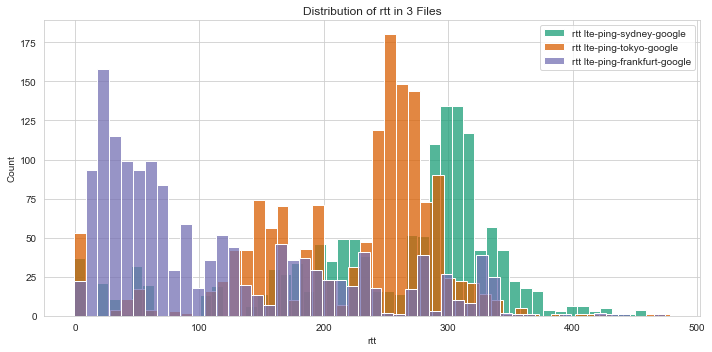

In [449]:
filenames = ["measurements/lte-ping-sydney-google.json", "measurements/lte-ping-tokyo-google.json", "measurements/lte-ping-frankfurt-google.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)


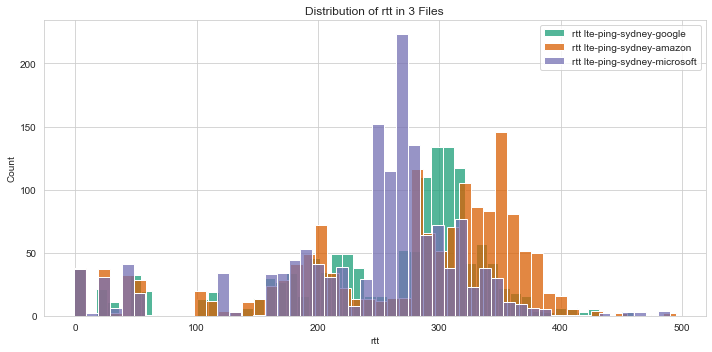

In [450]:
filenames = ["measurements/lte-ping-sydney-google.json", "measurements/lte-ping-sydney-amazon.json", "measurements/lte-ping-sydney-microsoft.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

## Salellite

In [451]:
filename = "measurements/satellite-ping-frankfurt-google.json"
generate_map(filename)

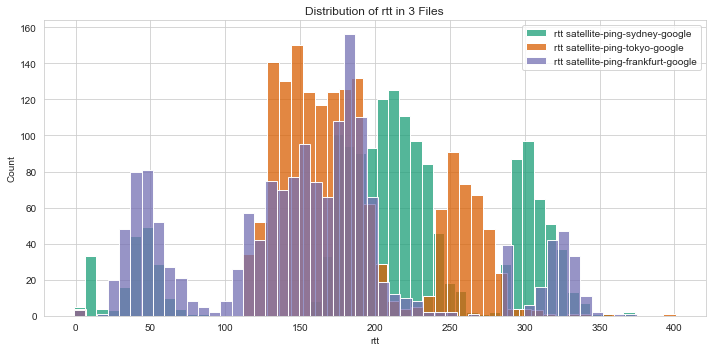

In [452]:
filenames = ["measurements/satellite-ping-sydney-google.json", "measurements/satellite-ping-tokyo-google.json", "measurements/satellite-ping-frankfurt-google.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

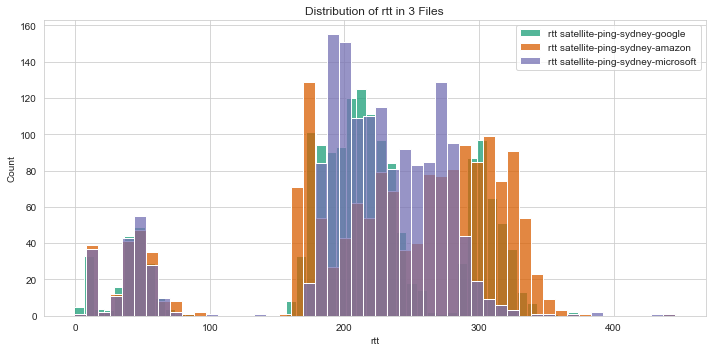

In [453]:
filenames = ["measurements/satellite-ping-sydney-google.json", "measurements/satellite-ping-sydney-amazon.json", "measurements/satellite-ping-sydney-microsoft.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

## WIFI

In [454]:
filename = "measurements/wifi-ping-frankfurt-google.json"
generate_map(filename)

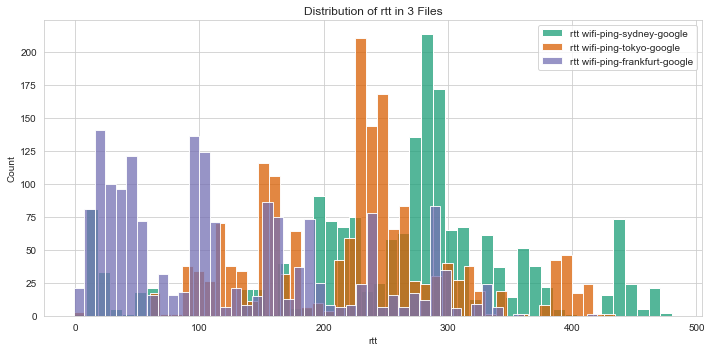

In [455]:
filenames = ["measurements/wifi-ping-sydney-google.json", "measurements/wifi-ping-tokyo-google.json", "measurements/wifi-ping-frankfurt-google.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

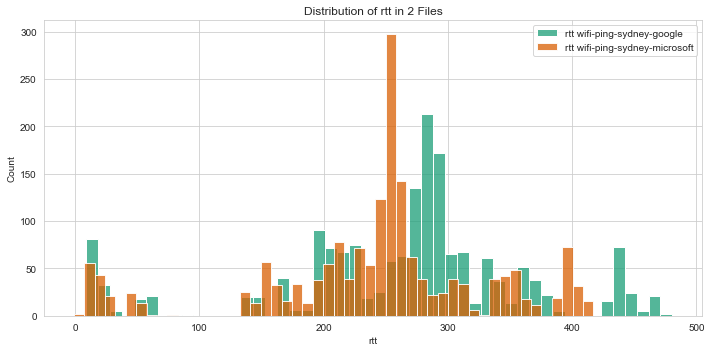

In [456]:
filenames = ["measurements/wifi-ping-sydney-google.json", "measurements/wifi-ping-sydney-microsoft.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

## Cable

In [457]:
filename = "measurements/cable-ping-tokyo-google.json"
generate_map(filename)

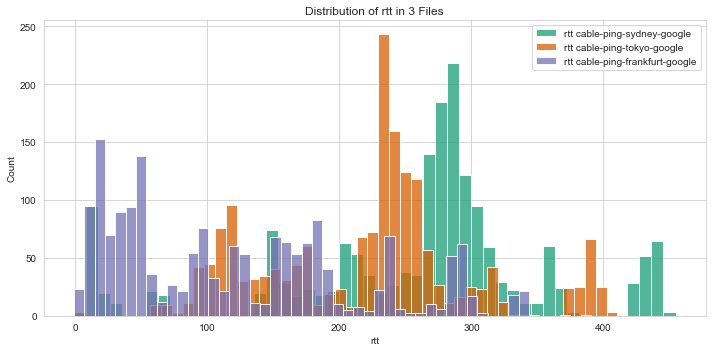

In [458]:
filenames = ["measurements/cable-ping-sydney-google.json", "measurements/cable-ping-tokyo-google.json", "measurements/cable-ping-frankfurt-google.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

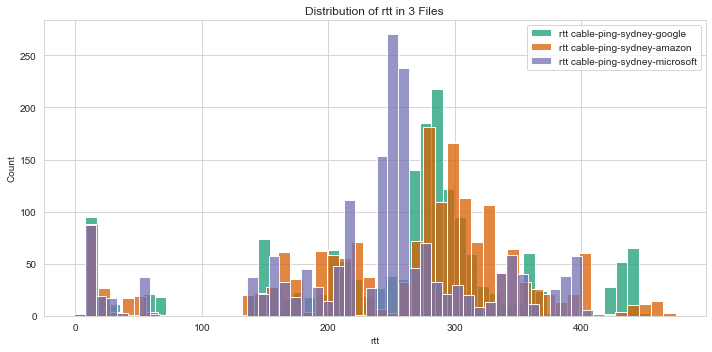

In [459]:
filenames = ["measurements/cable-ping-sydney-google.json", "measurements/cable-ping-sydney-amazon.json", "measurements/cable-ping-sydney-microsoft.json"]
create_joined_histogram(filenames, 'rtt', 50, 800)

In [460]:
# Path to the directory containing the JSON files
# directory = 'measurements'

filename = "measurements/lte-traceroute-tokyo-google.json"

dataframes = []

# for filename in os.listdir(directory):
    
#     if filename.startswith("lte-ping"):

#         df = pd.read_json(os.path.join(directory, filename))

#         dataframes.append(df)

df = pd.read_json(filename)

# rtt = []
# for row in df['result']:
#     arr = []
#     for i in row: 
#         if(i.get('rtt') is not None):
#             arr.append(i.get('rtt'))

#     arr = sorted(arr)
#     if(len(arr) > 1):
#         rtt.append(arr[1])
#     elif(len(arr) > 0):
#         rtt.append(arr[0])
#     else:
#         rtt.append(-1)
    
# s = pd.Series(rtt)

# df['rtt'] = s

# df.drop(columns=['result'])
# result_df = pd.json_normalize(df["result"])

# result_df[result_df.columns[0]] = result_df[result_df.columns[0]].apply(lambda x: x.get('rtt'))



In [461]:
df

fw   mver  lts     endtime        dst_name        dst_addr  \
0     5080  2.6.2   86  1675209687  35.221.115.203  35.221.115.203   
1     5080  2.6.2   28  1675209719  35.221.115.203  35.221.115.203   
2     5080  2.6.2   10  1675209724  35.221.115.203  35.221.115.203   
3     4790    NaN   57  1675209718  35.221.115.203  35.221.115.203   
4     5080  2.6.2   53  1675209672  35.221.115.203  35.221.115.203   
...    ...    ...  ...         ...             ...             ...   
1494  5080  2.6.2   35  1675893989  35.221.115.203  35.221.115.203   
1495  5080  2.6.2   96  1675894028  35.221.115.203  35.221.115.203   
1496  5080  2.6.2   77  1675894002  35.221.115.203  35.221.115.203   
1497  4790    NaN  601  1675893995  35.221.115.203  35.221.115.203   
1498  5080  2.6.2    5  1675894056  35.221.115.203  35.221.115.203   

             src_addr proto  af  size  paris_id  \
0        192.168.1.77  ICMP   4    48         1   
1     192.168.132.128  ICMP   4    48         1   
2        192.168.9.50  ICMP   4    48         1   
3      192.168.25.106  ICMP   4    48         1   
4      192.168.178.17  ICMP   4    48         1   
...               ...   ...  ..   ...       ...   
1494  192.168.160.116  ICMP   4    48        10   
1495       10.0.0.206  ICMP   4    48         4   
1496    192.168.0.155  ICMP   4    48         2   
1497     192.168.1.32  ICMP   4    48        12   
1498    192.168.2.106  ICMP   4    48         4   

                                                 result    msm_id  prb_id  \
0     [{'hop': 1, 'result': [{'from': '192.168.1.254...  49339890   14226   
1     [{'hop': 1, 'result': [{'from': '192.168.132.1...  49339890   17602   
2     [{'hop': 1, 'result': [{'from': '192.168.9.1',...  49339890   18565   
3     [{'hop': 1, 'result': [{'from': '192.168.25.1'...  49339890    3333   
4     [{'hop': 1, 'result': [{'from': '192.168.178.1...  49339890   50412   
...                                                 ...       ...     ...   
1494  [{'hop': 1, 'result': [{'from': '192.168.160.1...  49339890   29793   
1495  [{'hop': 1, 'result': [{'from': '10.0.0.1', 't...  49339890   54866   
1496  [{'hop': 1, 'result': [{'from': '192.168.0.1',...  49339890   62868   
1497  [{'hop': 1, 'result': [{'from': '192.168.1.1',...  49339890     689   
1498  [{'hop': 1, 'result': [{'from': '192.168.2.1',...  49339890   50532   

               timestamp    msm_name            from        type  group_id  \
0    2023-02-01 00:01:09  Traceroute  107.126.113.53  traceroute  49339889   
1    2023-02-01 00:01:46  Traceroute    211.7.85.169  traceroute  49339889   
2    2023-02-01 00:01:50  Traceroute     84.78.16.39  traceroute  49339889   
3    2023-02-01 00:01:45  Traceroute   87.135.28.138  traceroute  49339889   
4    2023-02-01 00:01:11  Traceroute    89.56.63.177  traceroute  49339889   
...                  ...         ...             ...         ...       ...   
1494 2023-02-08 22:06:16  Traceroute    80.62.117.82  traceroute  49339889   
1495 2023-02-08 22:06:43  Traceroute    31.94.31.194  traceroute  49339889   
1496 2023-02-08 22:06:41  Traceroute    98.97.119.54  traceroute  49339889   
1497 2023-02-08 22:06:34  Traceroute  143.238.136.79  traceroute  49339889   
1498 2023-02-08 22:07:11  Traceroute   93.244.25.108  traceroute  49339889   

      stored_timestamp  
0           1675209793  
1           1675209740  
2           1675209810  
3           1675209825  
4           1675209742  
...                ...  
1494        1675894195  
1495        1675894142  
1496        1675894113  
1497        1675894193  
1498        1675894110  

[1499 rows x 20 columns]

In [462]:


ip_address = '217.5.88.114' 
try:
    hostname = socket.gethostbyaddr(ip_address)[0]
    print(f"The host name for {ip_address} is {hostname}")
except socket.herror as ex:
    print(f"Error: {ex}")


The host name for 217.5.88.114 is f-ed11-i.f.de.net.dtag.de


In [463]:
def get_hostname(ip_address):
    try:
        hostname = socket.gethostbyaddr(ip_address)[0]
        return hostname
    except socket.herror as ex:
        return ""

In [464]:
def get_isp(ip_address):
    try:
        ip = IPWhois(ip_address)
        result = ip.lookup_rdap(depth=1)
        isp = result.get('network').get('name')
        print(isp)
    except:
        print("Error")

# RTT over the world

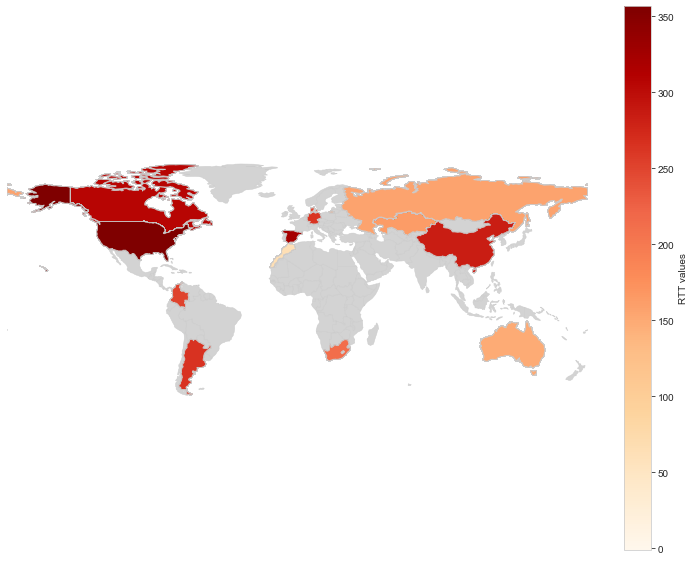

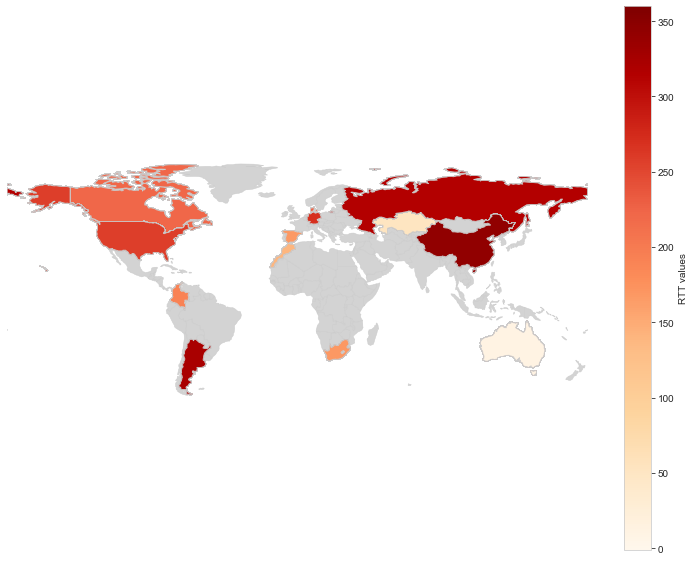

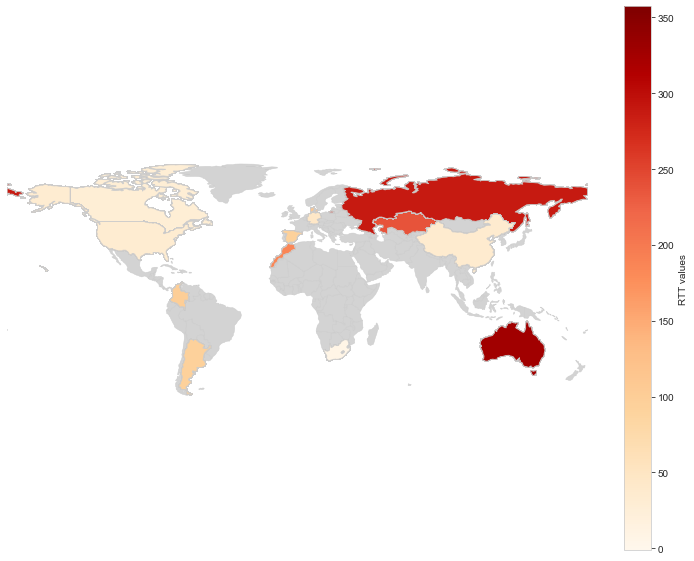

In [465]:
rtt_map('measurements/wifi-ping-tokyo-google.json')
rtt_map('measurements/wifi-ping-sydney-google.json')
rtt_map('measurements/wifi-ping-frankfurt-google.json')

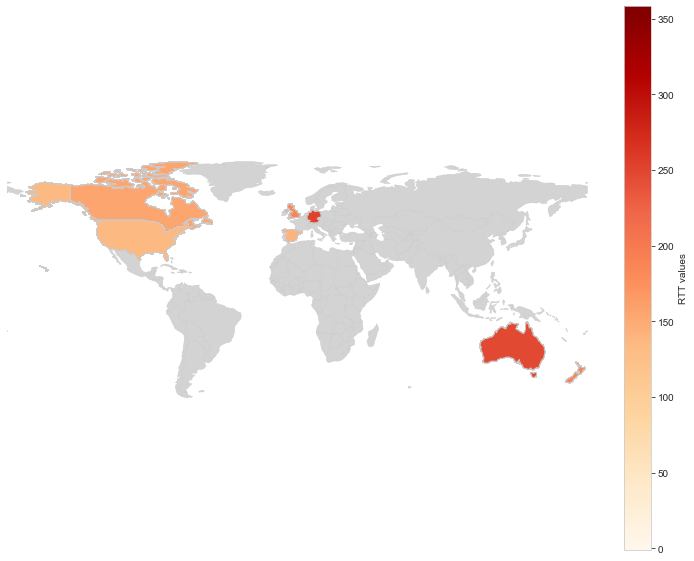

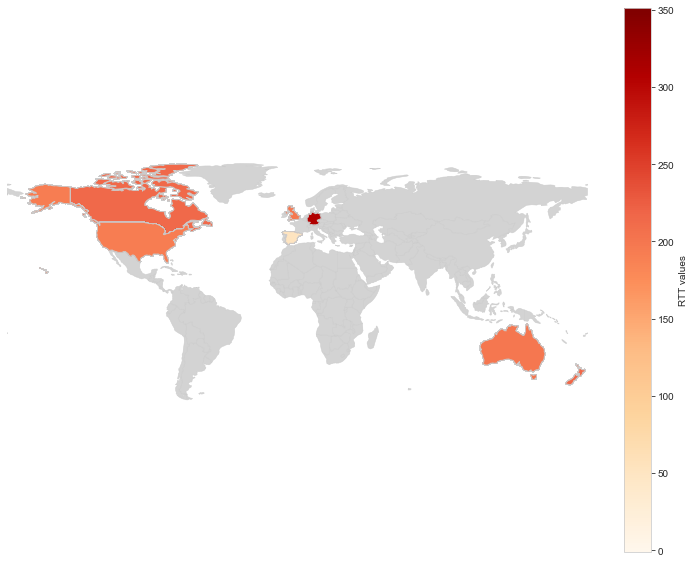

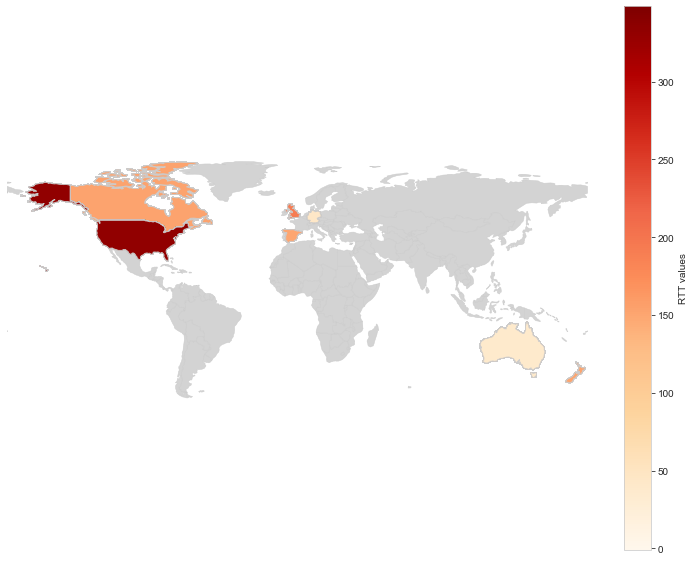

In [466]:
rtt_map('measurements/satellite-ping-tokyo-google.json')
rtt_map('measurements/satellite-ping-sydney-google.json')
rtt_map('measurements/satellite-ping-frankfurt-google.json')

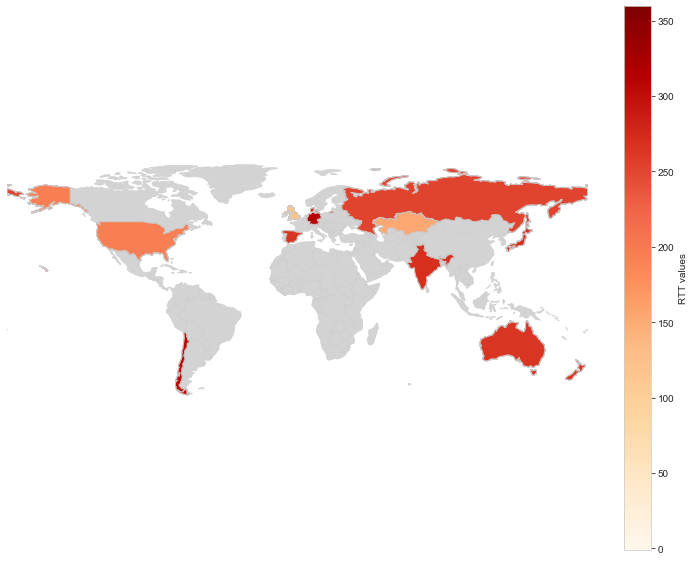

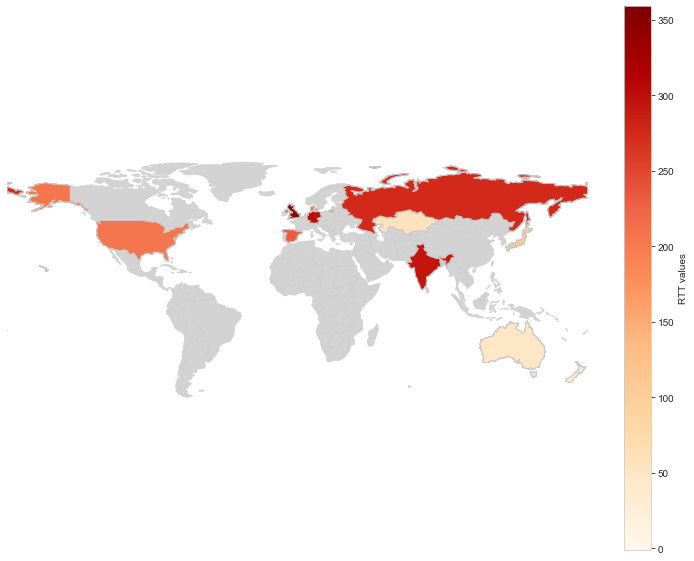

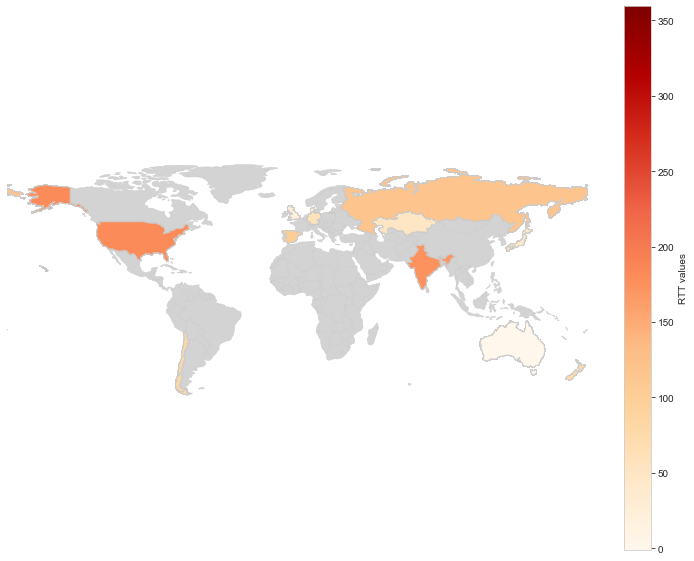

In [467]:
rtt_map('measurements/lte-ping-tokyo-google.json')
rtt_map('measurements/lte-ping-sydney-google.json')
rtt_map('measurements/lte-ping-frankfurt-google.json')

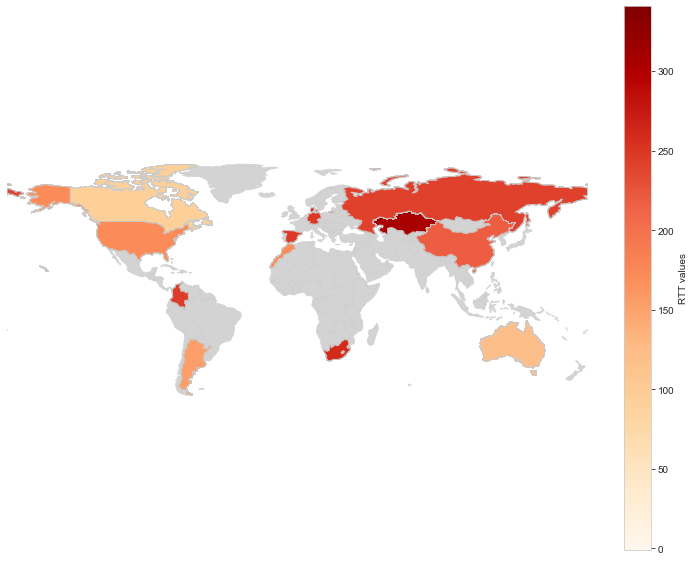

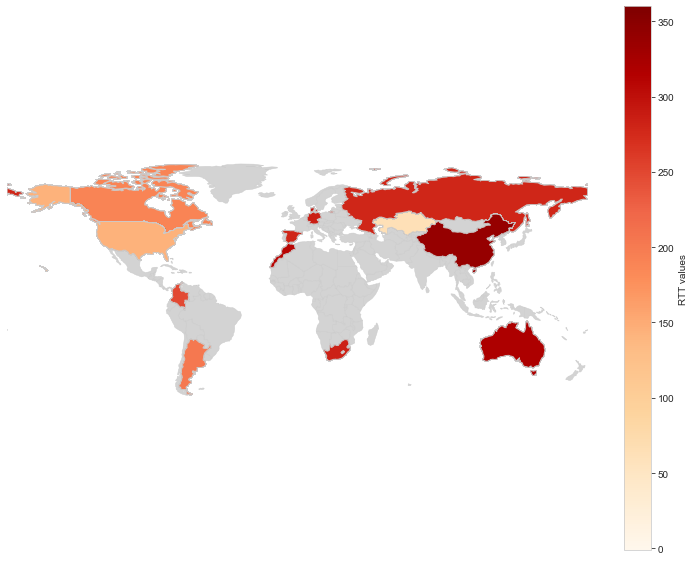

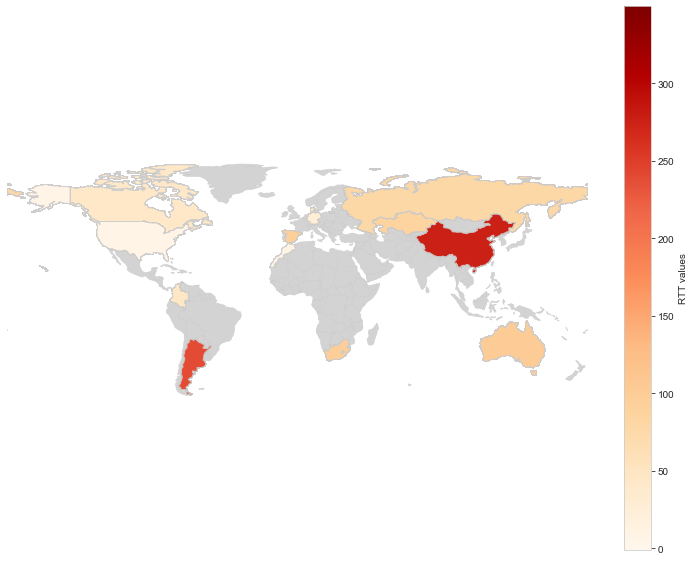

In [468]:
rtt_map('measurements/cable-ping-tokyo-google.json')
rtt_map('measurements/cable-ping-sydney-google.json')
rtt_map('measurements/cable-ping-frankfurt-google.json')

# Compare LTE & Cable & Satellite [sydney cloud - DE probes]

In [469]:
df1 = process_json_file_ping('measurements/lte-ping-sydney-google.json')

df2 = process_json_file_ping('measurements/cable-ping-sydney-google.json')

df3 = process_json_file_ping('measurements/satellite-ping-sydney-google.json')

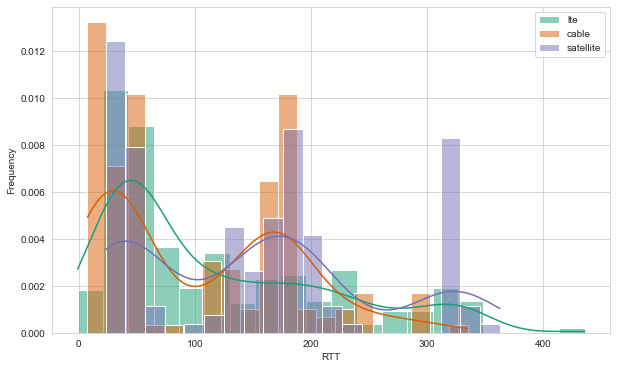

In [470]:
color_map = plt.get_cmap('Dark2')
colors = [color_map(i) for i in range(3)]

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
# plt.yscale('log')
sns.histplot(filtered_df1, x='rtt', bins=20, kde=True, color=colors[0], alpha=0.5, label='lte', ax=ax, stat='density')
sns.histplot(filtered_df2, x='rtt', bins=20, kde=True, color=colors[1], alpha=0.5, label='cable', ax=ax, stat='density')
sns.histplot(filtered_df3, x='rtt', bins=20, kde=True, color=colors[2], alpha=0.5, label='satellite', ax=ax, stat='density')

# set the axis labels and legend
ax.set_xlabel('RTT')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

plt.show()


In [471]:
arr = []
for i in df3['prb_id']:
    arr.append(map_[i])

In [472]:
df3['country_code'] = pd.Series(arr)

In [473]:
df3 = df3[df3['country_code'] == 'DE']

In [474]:
df1

fw   mver  lts        dst_name  af        dst_addr         src_addr  \
11    5080  2.6.2   59  34.151.112.196   4  34.151.112.196    192.168.0.155   
9     5080  2.6.2    3  34.151.112.196   4  34.151.112.196       10.0.0.206   
5     5080  2.6.2    8  34.151.112.196   4  34.151.112.196      192.168.1.2   
3     5080  2.6.2    7  34.151.112.196   4  34.151.112.196     192.168.0.18   
12    4790    NaN  245  34.151.112.196   4  34.151.112.196     192.168.1.32   
...    ...    ...  ...             ...  ..             ...              ...   
1378  5080  2.6.2   43  34.151.112.196   4  34.151.112.196    192.168.0.171   
1376  4790    NaN  878  34.151.112.196   4  34.151.112.196     172.16.0.200   
1379  5080  2.6.2   48  34.151.112.196   4  34.151.112.196     192.168.1.14   
1380  5080  2.6.2   12  34.151.112.196   4  34.151.112.196   192.168.12.163   
1381  5080  2.6.2   31  34.151.112.196   4  34.151.112.196  192.102.250.126   

     proto   ttl  size  ...  prb_id           timestamp  msm_name  \
11    ICMP  58.0    48  ...   62868 2023-02-02 22:21:20      Ping   
9     ICMP  55.0    48  ...   54866 2023-02-02 22:21:20      Ping   
5     ICMP  52.0    48  ...   26320 2023-02-02 22:21:21      Ping   
3     ICMP  58.0    48  ...   14842 2023-02-02 22:21:23      Ping   
12    ICMP  58.0    48  ...     689 2023-02-02 22:21:25      Ping   
...    ...   ...   ...  ...     ...                 ...       ...   
1378  ICMP  51.0    48  ...   52413 2023-02-09 14:27:14      Ping   
1376  ICMP  57.0    48  ...    3457 2023-02-09 14:27:16      Ping   
1379  ICMP  51.0    48  ...   54146 2023-02-09 14:27:17      Ping   
1380  ICMP  50.0    48  ...   61785 2023-02-09 14:27:59      Ping   
1381  ICMP  58.0    48  ...   28477 2023-02-09 14:28:01      Ping   

                 from  type  group_id   step  stored_timestamp         rtt  \
11       98.97.46.147  ping  49549054  36000        1675376611  195.375199   
9         31.94.31.95  ping  49549054  36000        1675376629  307.254292   
5       46.114.193.90  ping  49549054  36000        1675376614  331.548740   
3        31.4.241.125  ping  49549054  36000        1675376571  298.406652   
12     143.238.136.79  ping  49549054  36000        1675376687    6.272258   
...               ...   ...       ...    ...               ...         ...   
1378     89.31.112.10  ping  49549054  36000        1675952948  279.469292   
1376     125.30.16.89  ping  49549054  36000        1675952914  108.591382   
1379    89.189.189.41  ping  49549054  36000        1675952963  275.674417   
1380    172.58.84.151  ping  49549054  36000        1675952958  204.882090   
1381  192.102.250.126  ping  49549054  36000        1675952946   47.255982   

     country_code  
11             US  
9              US  
5              DE  
3              ES  
12             DE  
...           ...  
1378           JP  
1376           JP  
1379           RU  
1380           US  
1381           AU  

[1372 rows x 27 columns]

In [475]:
filtered_df1 = df1[df1['rtt'] < 700]
filtered_df2 = df2[df2['rtt'] < 700]
filtered_df3 = df3[df3['rtt'] < 700]

# Compare LTE & Cable & Satellite [frankfurt cloud - DE probes]

In [476]:
df1 = process_json_file_ping('measurements/lte-ping-frankfurt-google.json')

df2 = process_json_file_ping('measurements/cable-ping-frankfurt-google.json')

df3 = process_json_file_ping('measurements/satellite-ping-frankfurt-google.json')

In [477]:
# for i in df3['prb_id']:
#     if i in map_:
#         continue
#     else:
#         map_[i] = get_probe_country_code(i)

In [478]:
df1 = df1[df1['country_code'] == 'DE']
df2 = df2[df2['country_code'] == 'DE']
df3 = df3[df3['country_code'] == 'DE']

filtered_df1 = df1[df1['rtt'] < 700]
filtered_df2 = df2[df2['rtt'] < 700]
filtered_df3 = df3[df3['rtt'] < 700]

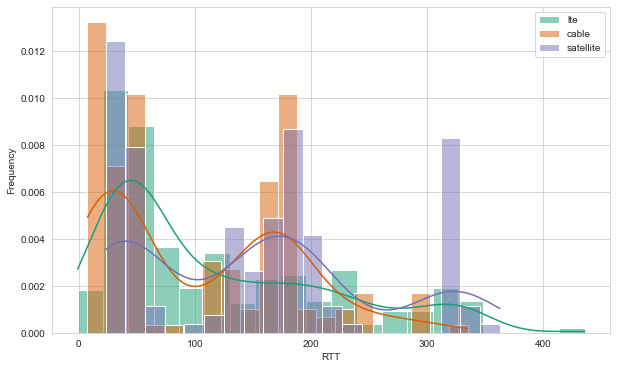

In [479]:
color_map = plt.get_cmap('Dark2')
colors = [color_map(i) for i in range(3)]

# create the plot
fig, ax = plt.subplots(figsize=(10, 6))
# plt.yscale('log')
sns.histplot(filtered_df1, x='rtt', bins=20, kde=True, color=colors[0], alpha=0.5, label='lte', ax=ax, stat='density')
sns.histplot(filtered_df2, x='rtt', bins=20, kde=True, color=colors[1], alpha=0.5, label='cable', ax=ax, stat='density')
sns.histplot(filtered_df3, x='rtt', bins=20, kde=True, color=colors[2], alpha=0.5, label='satellite', ax=ax, stat='density')

# set the axis labels and legend
ax.set_xlabel('RTT')
ax.set_ylabel('Frequency')
ax.legend(loc='upper right')

plt.show()

# Plot cloud servers

In [487]:
clouds = [[35.6762, 139.6503], [-33.8, 151.2], [50.1109, 8.6821]]

world_map = folium.Map(location=[0, 0], zoom_start=2)

for i in clouds:
    folium.Marker(location=i).add_to(world_map)
    
world_map

# RIPE probes RTT analysis

## Joined RTT graph

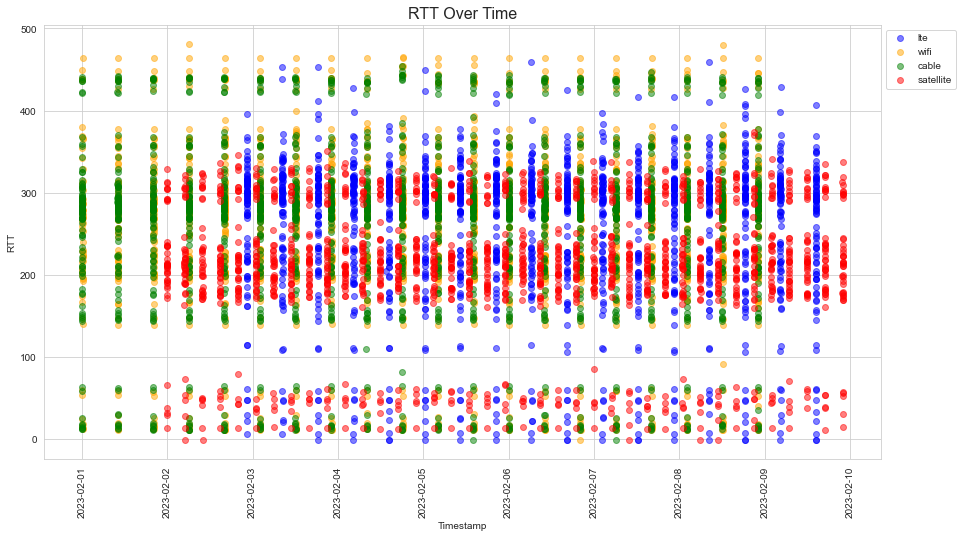

In [488]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])

df1 = process_json_file_ping('measurements/lte-ping-sydney-google.json')
df2 = process_json_file_ping('measurements/wifi-ping-sydney-google.json')
df3 = process_json_file_ping('measurements/cable-ping-sydney-google.json')
df4 = process_json_file_ping('measurements/satellite-ping-sydney-google.json')

df1.set_index('timestamp', inplace=True)
df2.set_index('timestamp', inplace=True)
df3.set_index('timestamp', inplace=True)
df4.set_index('timestamp', inplace=True)

fig, ax = plt.subplots(figsize=(15,8))

sns.set_style('whitegrid')

ax.scatter(df1.index, df1['rtt'], color='blue', alpha=0.5, label='lte')
ax.scatter(df2.index, df2['rtt'], color='orange', alpha=0.5, label='wifi')
ax.scatter(df3.index, df3['rtt'], color='green', alpha=0.5, label='cable')
ax.scatter(df4.index, df4['rtt'], color='red', alpha=0.5, label='satellite')

# set the x-axis label
plt.xlabel('Timestamp')

# set the y-axis label
plt.ylabel('RTT')
plt.title('RTT Over Time', fontsize=16)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

plt.xticks(rotation=90)

plt.show()

In [489]:
# df['timestamp'] = pd.to_datetime(df['timestamp'])

df1 = process_json_file_ping('measurements/lte-ping-sydney-google.json')
df2 = process_json_file_ping('measurements/wifi-ping-sydney-google.json')
df3 = process_json_file_ping('measurements/cable-ping-sydney-google.json')
df4 = process_json_file_ping('measurements/satellite-ping-sydney-google.json')

df1.set_index('timestamp', inplace=True)
df2.set_index('timestamp', inplace=True)
df3.set_index('timestamp', inplace=True)
df4.set_index('timestamp', inplace=True)

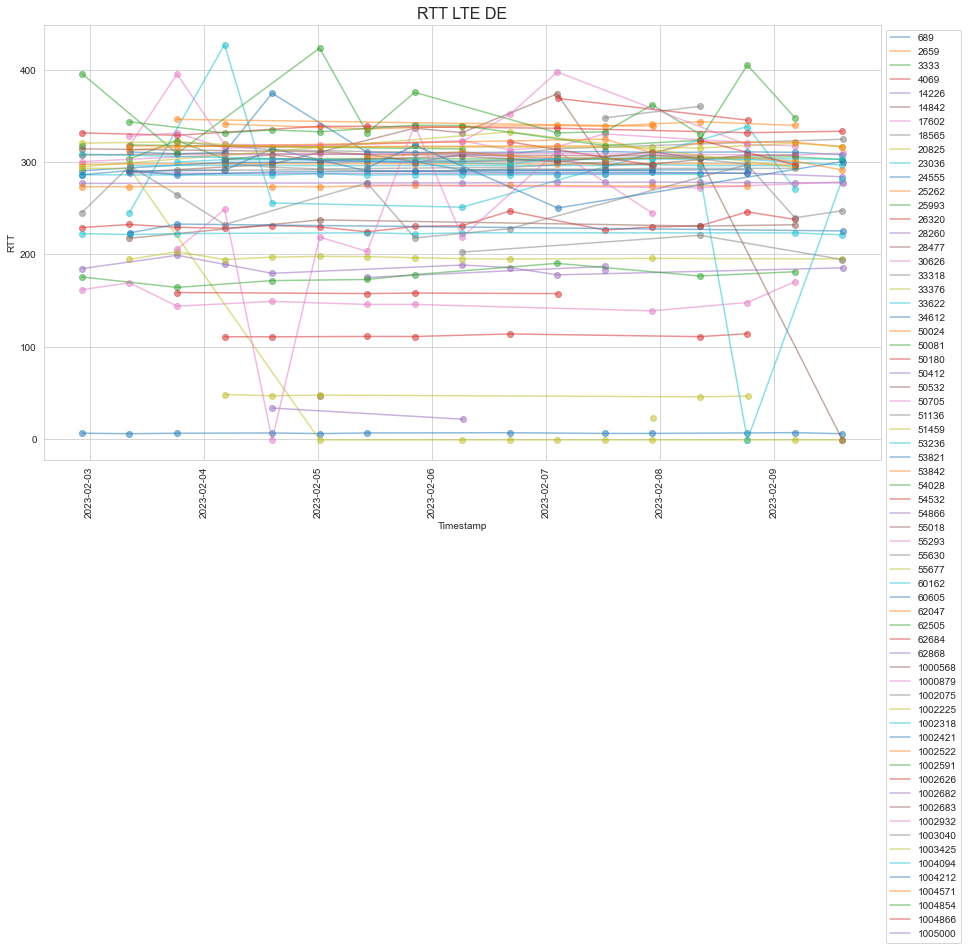

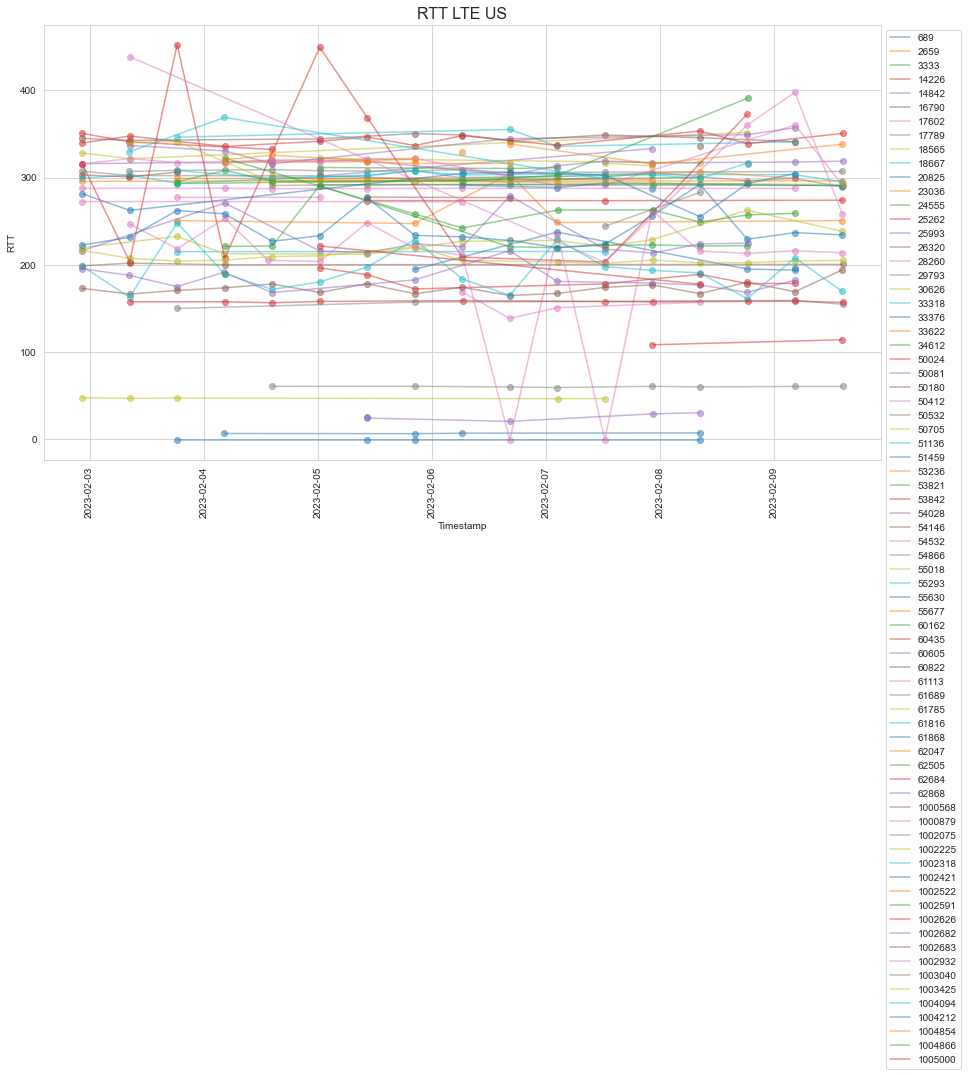

In [483]:
# lte-ping-sydney-google
rtt_by_probe(df1, "DE", "LTE")
rtt_by_probe(df1, "US", "LTE")

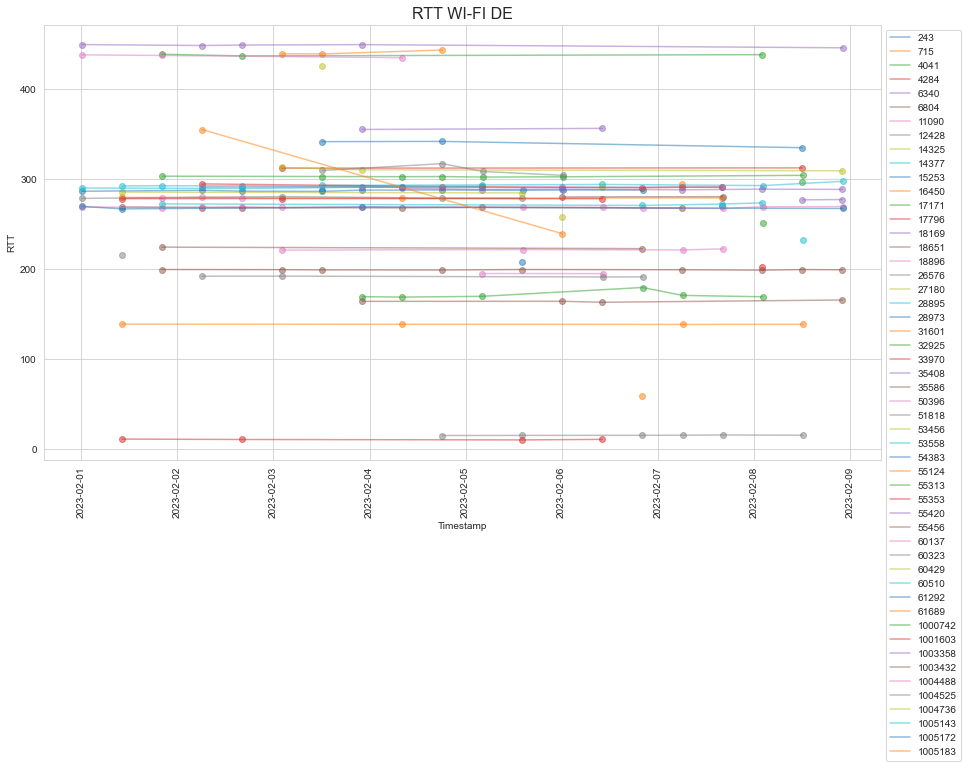

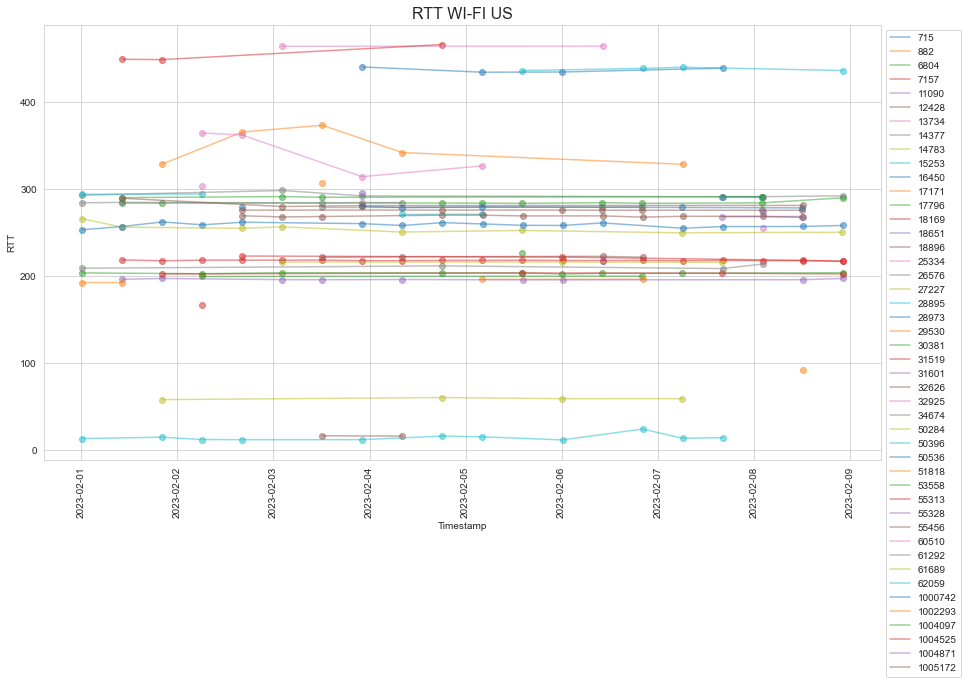

In [484]:
# wifi-ping-sydney-google
rtt_by_probe(df2, "DE", "WI-FI")
rtt_by_probe(df2, "US", "WI-FI")

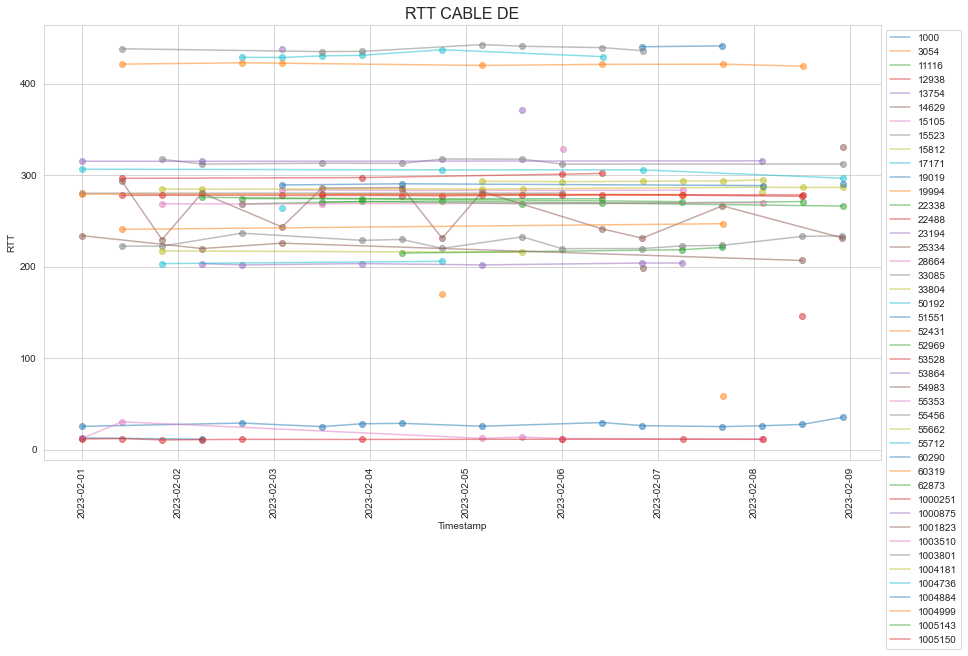

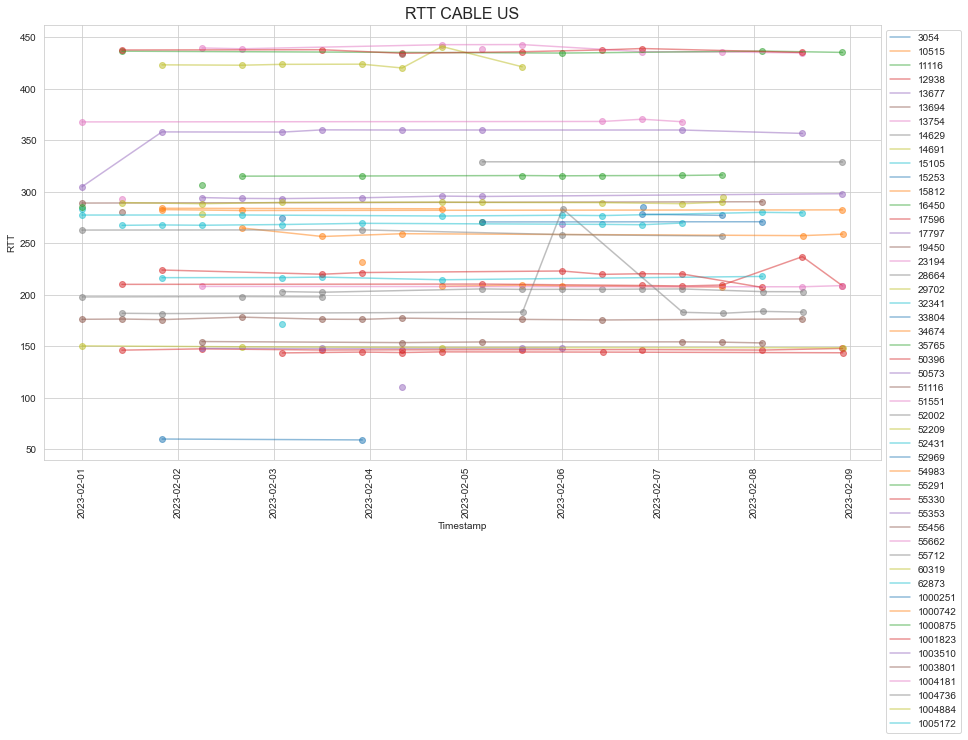

In [485]:
# cable-ping-sydney-google
rtt_by_probe(df3, "DE", "CABLE")
rtt_by_probe(df3, "US", "CABLE")

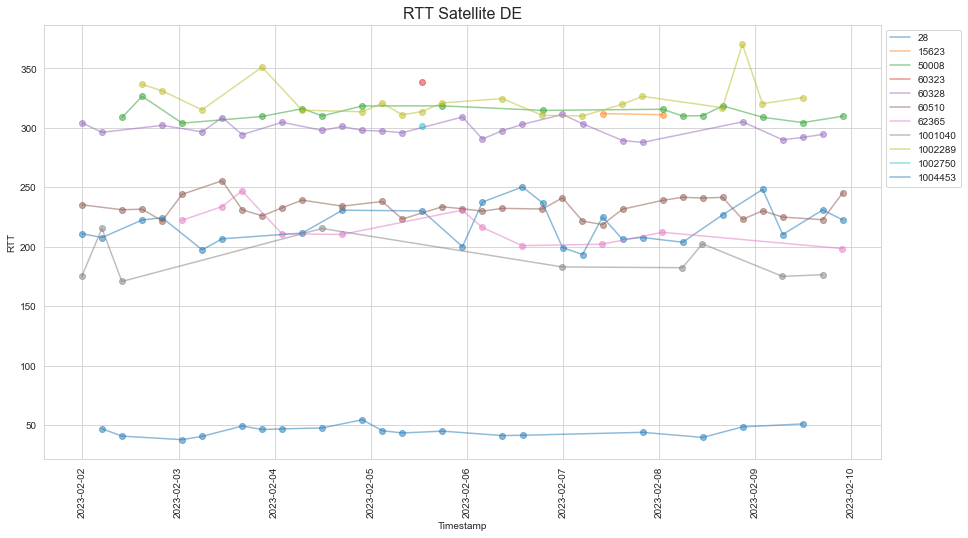

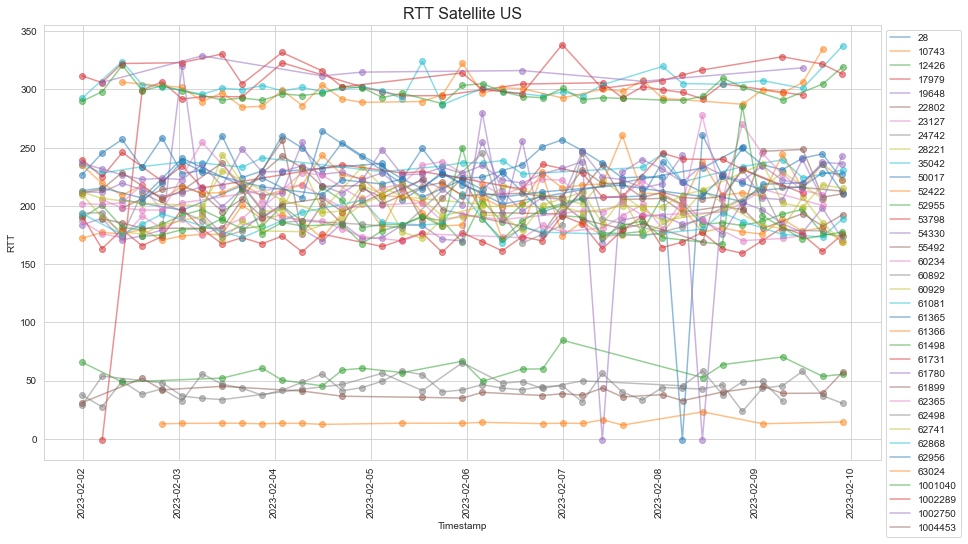

In [486]:
# satellite-ping-sydney-google
rtt_by_probe(df4, "DE", "Satellite")
rtt_by_probe(df4, "US", "Satellite")